In [ ]:
#Imprt the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10
from warnings import filterwarnings
filterwarnings("ignore")

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.impute import SimpleImputer

In [ ]:
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
#Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Directory path for Problem 1
path="/content/drive/My Drive/Great Learning/Predictive Modeling/week1/compactiv.xlsx"

In [ ]:
#Directory path for Problem 2
path1="/content/drive/My Drive/Great Learning/Predictive Modeling/week1/Contraceptive_method_dataset.xlsx"

In [ ]:
#Read The Dataset of Problem 1
df=pd.read_excel(path)

- PM Project

Data Dictionary

Context

The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.


Data Description :


System measures used:


* lread - Reads (transfers per second ) between system memory and user memory
*  lwrite - writes (transfers per second) between system memory and user memory
*  scall - Number of system calls of all types per second
* sread - Number of system read calls per second .
* swrite - Number of system write calls per second .
* fork - Number of system fork calls per second.
* exec - Number of system exec calls per second.
* rchar - Number of characters transferred per second by system read calls
* wchar - Number of characters transfreed per second by system write calls
* pgout - Number of page out requests per second
* ppgout - Number of pages, paged out per second
* pgfree - Number of pages per second placed on the free list.
* pgscan - Number of pages checked if they can be freed per second
* atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
*  pgin - Number of page-in requests per second
*  ppgin - Number of pages paged in per second
* pflt - Number of page faults caused by protection errors (copy-on-writes).
* vflt - Number of page faults caused by address translation .
* runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
* Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
* freemem - Number of memory pages available to user processes
* freeswap - Number of disk blocks available for page swapping.
------------------------
* usr - Portion of time (%) that cpus run in user mode

###Problem 1 - Exploratory Data Analysis
-  Data types, statistical summary - Univariate analysis - Multivariate analysis -visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [ ]:
#read first five rows of Data set
#pd.set_option('display.max_rows', None)
pd.set_option("display.max_column", None)
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ppgout  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  \
0     0.0     0.0     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound   
1     0.0     0.0     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound   
2     0.0     0.0     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound   
3     0.0     0.0     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound   
4     0.0     0.0     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound   

   freemem  freeswap  usr  
0     4670   1730946   95  
1     7278   1869002   97  
2      702   1021237   87  
3     7248   1863704   98  
4      633   1760253   90

In [ ]:
#read the datatype of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [ ]:
#Shape of Datset
df.shape

(8192, 22)

There are 8192 Rows and 22 Column

* Float64-13
* int64- 8
* Object 1

In [ ]:
df.isnull().sum().loc[lambda x: x > 0]

rchar    104
wchar     15
dtype: int64

* Rwhar and wchar have the Null values  
 * rchar ---->> 104
  * wchar---->> 15
  

In [ ]:
#check the duplicated value
dups=df.duplicated()
dups.sum()

0

In [ ]:
#No duplicate Rows in the Dataset
print("The Duplicate Rows in the Data =%d"% (dups.sum()))

The Duplicate Rows in the Data =0


In [ ]:
#Statistics of the Dataset
pd.set_option("display.max_rows", None)
np.round(df.describe(include="all").T,4)

count unique            top  freq            mean            std  \
lread     8192.0    NaN            NaN   NaN       19.559692      53.353799   
lwrite    8192.0    NaN            NaN   NaN       13.106201      29.891726   
scall     8192.0    NaN            NaN   NaN     2306.318237    1633.617322   
sread     8192.0    NaN            NaN   NaN       210.47998     198.980146   
swrite    8192.0    NaN            NaN   NaN      150.058228      160.47898   
fork      8192.0    NaN            NaN   NaN        1.884554       2.479493   
exec      8192.0    NaN            NaN   NaN        2.791998       5.212456   
rchar     8088.0    NaN            NaN   NaN   197385.728363  239837.493526   
wchar     8177.0    NaN            NaN   NaN    95902.992785  140841.707911   
pgout     8192.0    NaN            NaN   NaN        2.285317       5.307038   
ppgout    8192.0    NaN            NaN   NaN        5.977229       15.21459   
pgfree    8192.0    NaN            NaN   NaN       11.919712       32.36352   
pgscan    8192.0    NaN            NaN   NaN       21.526849       71.14134   
atch      8192.0    NaN            NaN   NaN        1.127505       5.708347   
pgin      8192.0    NaN            NaN   NaN         8.27796      13.874978   
ppgin     8192.0    NaN            NaN   NaN       12.388586      22.281318   
pflt      8192.0    NaN            NaN   NaN      109.793799     114.419221   
vflt      8192.0    NaN            NaN   NaN      185.315796     191.000603   
runqsz      8192      2  Not_CPU_Bound  4331             NaN            NaN   
freemem   8192.0    NaN            NaN   NaN     1763.456299    2482.104511   
freeswap  8192.0    NaN            NaN   NaN  1328125.959839  422019.426957   
usr       8192.0    NaN            NaN   NaN       83.968872      18.401905   

             min        25%        50%        75%        max  
lread        0.0        2.0        7.0       20.0     1845.0  
lwrite       0.0        0.0        1.0       10.0      575.0  
scall      109.0     1012.0     2051.5    3317.25    12493.0  
sread        6.0       86.0      166.0      279.0     5318.0  
swrite       7.0       63.0      117.0      185.0     5456.0  
fork         0.0        0.4        0.8        2.2      20.12  
exec         0.0        0.2        1.2        2.8      59.56  
rchar      278.0    34091.5   125473.5  267828.75  2526649.0  
wchar     1498.0    22916.0    46619.0   106101.0  1801623.0  
pgout        0.0        0.0        0.0        2.4      81.44  
ppgout       0.0        0.0        0.0        4.2      184.2  
pgfree       0.0        0.0        0.0        5.0      523.0  
pgscan       0.0        0.0        0.0        0.0     1237.0  
atch         0.0        0.0        0.0        0.6     211.58  
pgin         0.0        0.6        2.8      9.765      141.2  
ppgin        0.0        0.6        3.8       13.8     292.61  
pflt         0.0       25.0       63.8      159.6      899.8  
vflt         0.2       45.4      120.4      251.8     1365.0  
runqsz       NaN        NaN        NaN        NaN        NaN  
freemem     55.0      231.0      579.0    2002.25    12027.0  
freeswap     2.0  1042623.5  1289289.5  1730379.5  2243187.0  
usr          0.0       81.0       89.0       94.0       99.0

count    8.088000e+03
mean     1.973857e+05
std      2.398375e+05
min      2.780000e+02
25%      3.409150e+04
50%      1.254735e+05
75%      2.678288e+05
max      2.526649e+06
Name: rchar, dtype: float64

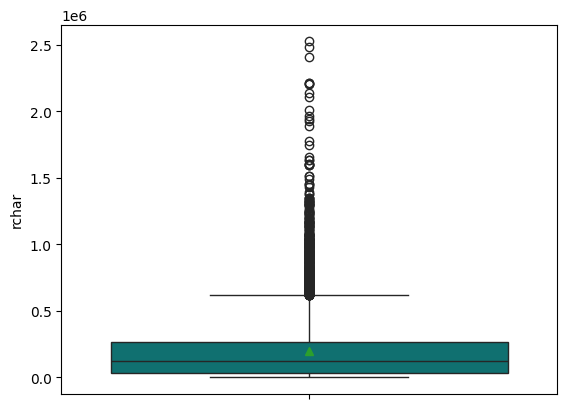

In [ ]:
#Box Plot of Rchar
sns.boxplot(df['rchar'], color="teal", showmeans=True)
df["rchar"].describe()


count       8177.00
mean       95902.99
std       140841.71
min         1498.00
25%        22916.00
50%        46619.00
75%       106101.00
max      1801623.00
Name: wchar, dtype: float64

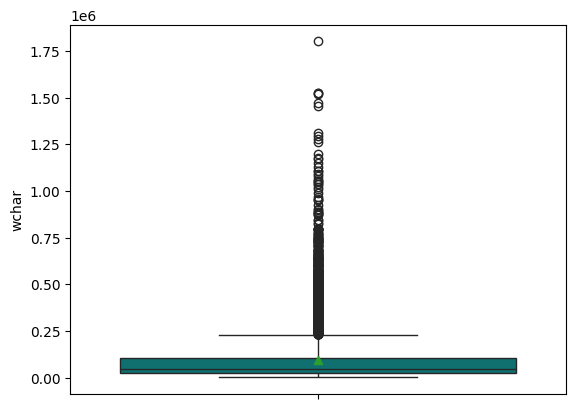

In [ ]:
#Box Plot of wchar
sns.boxplot(df['wchar'], color="teal", showmeans=True)
np.round(df["wchar"].describe(),2)


In [ ]:
#unique values in the Categorical Values
df.runqsz.value_counts()

runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: count, dtype: int64

No spelling error in the Categorical values

In [ ]:
#subset of the numeric value of the Dataset
df_num=df.select_dtypes(include=np.number)
df_num.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ppgout  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  \
0     0.0     0.0     0.0   0.0   1.6    2.6   16.00   26.40     4670   
1     0.0     0.0     0.0   0.0   0.0    0.0   15.63   16.83     7278   
2     0.0     0.0     0.0   1.2   6.0    9.4  150.20  220.20      702   
3     0.0     0.0     0.0   0.0   0.2    0.2   15.60   16.80     7248   
4     0.0     0.0     0.0   0.0   1.0    1.2   37.80   47.60      633   

   freeswap  usr  
0   1730946   95  
1   1869002   97  
2   1021237   87  
3   1863704   98  
4   1760253   90

In [ ]:
#impute the missing values in the Dataframe with median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imr=imputer.fit(df_num)
df_num=pd.DataFrame(imr.transform(df_num),columns=df_num.columns)

In [ ]:
#first five rows of numeric value
df_num.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem   freeswap  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40   4670.0  1730946.0   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83   7278.0  1869002.0   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20    702.0  1021237.0   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80   7248.0  1863704.0   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60    633.0  1760253.0   

    usr  
0  95.0  
1  97.0  
2  87.0  
3  98.0  
4  90.0  

[5 rows x 21 columns]

In [ ]:
#find the null values after the imputation of the missing values
df_num.isnull().sum().loc[lambda x:x>0]

Series([], dtype: int64)

There is no Null values in the Dataset

* All Null values has been Treated

####Univarient Analysis

In [ ]:
#Function to show the Univarient Analsysis
def histogram_boxplot(data, variable, bins="auto"):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  #fig, axes = plt.subplots(2, 1, figsize=(8, 6))

  a1=sns.histplot(data[variable], kde=True, bins=10, color="teal", ec="r", ax=axes[0])
  a1.bar_label(a1.containers[0], color='teal')
  a1.set_xlabel(variable)
  a1.set_ylabel(variable)
  a1.set_title(variable)
  a2=sns.boxplot(data[variable], orient="v", showmeans = True, color="teal", meanline = True, ax=axes[1])
  a2.set_xlabel(variable)
  a2.set_ylabel(variable)
  a2.set_title(variable)
  fig.suptitle('Histogram and Boxplot for ' + variable)
  plt.tight_layout()
  plt.show()
  #return fig, axES

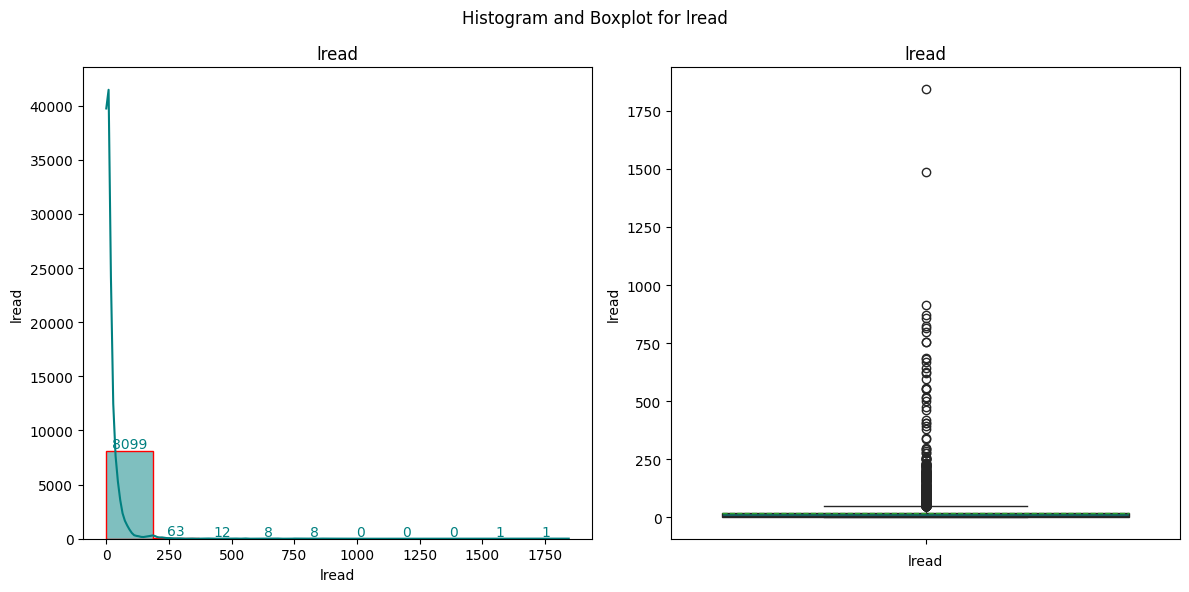

Skewness: 13.897852242774922
Statistical Summary count    8192.000000
mean       19.559692
std        53.353799
min         0.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      1845.000000
Name: lread, dtype: float64
________________________


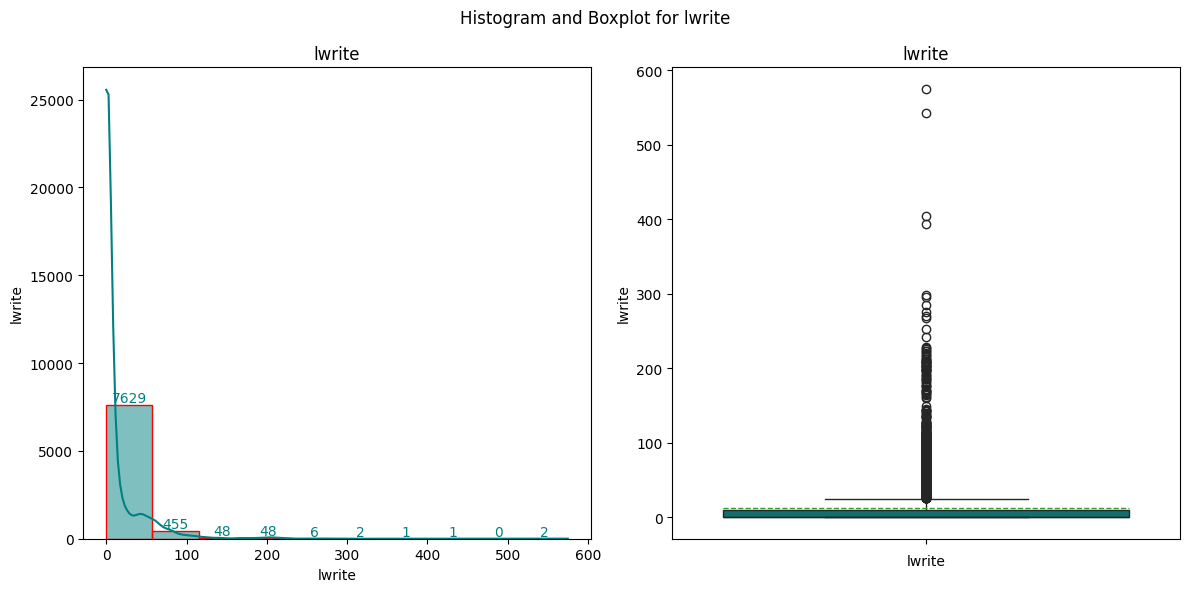

Skewness: 5.27764452621306
Statistical Summary count    8192.000000
mean       13.106201
std        29.891726
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max       575.000000
Name: lwrite, dtype: float64
________________________


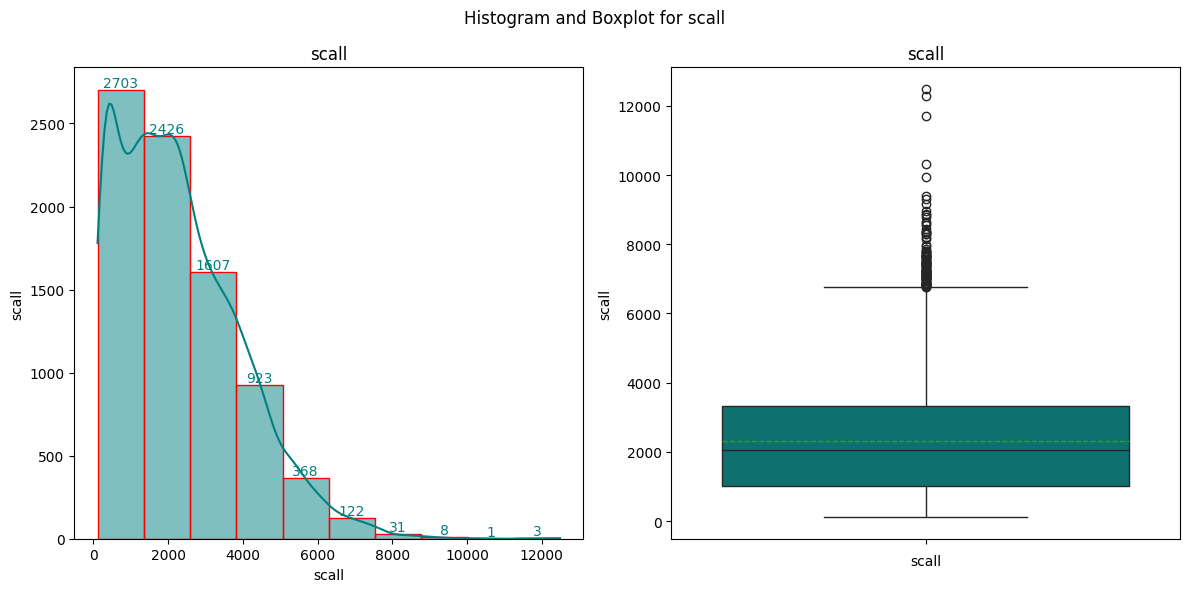

Skewness: 0.9025312213201333
Statistical Summary count     8192.000000
mean      2306.318237
std       1633.617322
min        109.000000
25%       1012.000000
50%       2051.500000
75%       3317.250000
max      12493.000000
Name: scall, dtype: float64
________________________


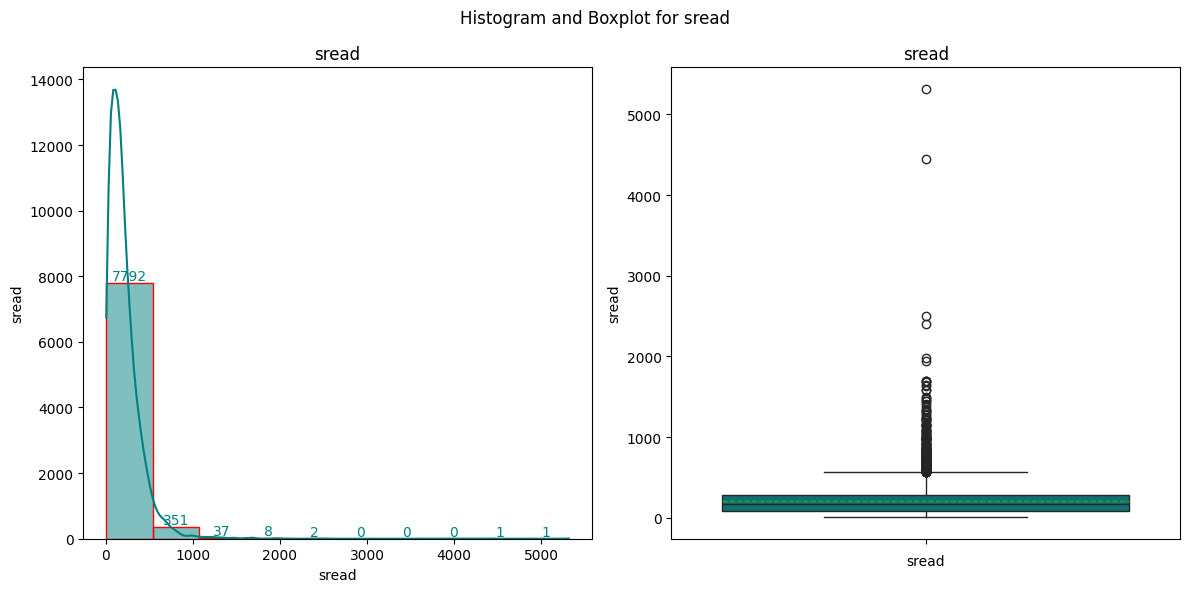

Skewness: 5.459465962452425
Statistical Summary count    8192.000000
mean      210.479980
std       198.980146
min         6.000000
25%        86.000000
50%       166.000000
75%       279.000000
max      5318.000000
Name: sread, dtype: float64
________________________


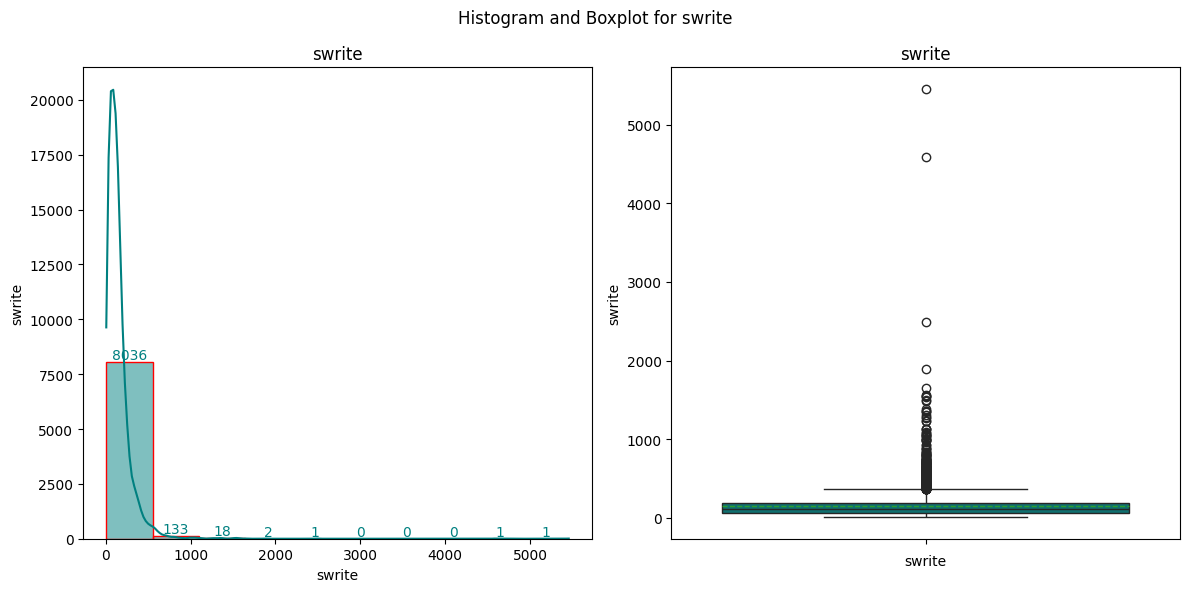

Skewness: 9.605843698195871
Statistical Summary count    8192.000000
mean      150.058228
std       160.478980
min         7.000000
25%        63.000000
50%       117.000000
75%       185.000000
max      5456.000000
Name: swrite, dtype: float64
________________________


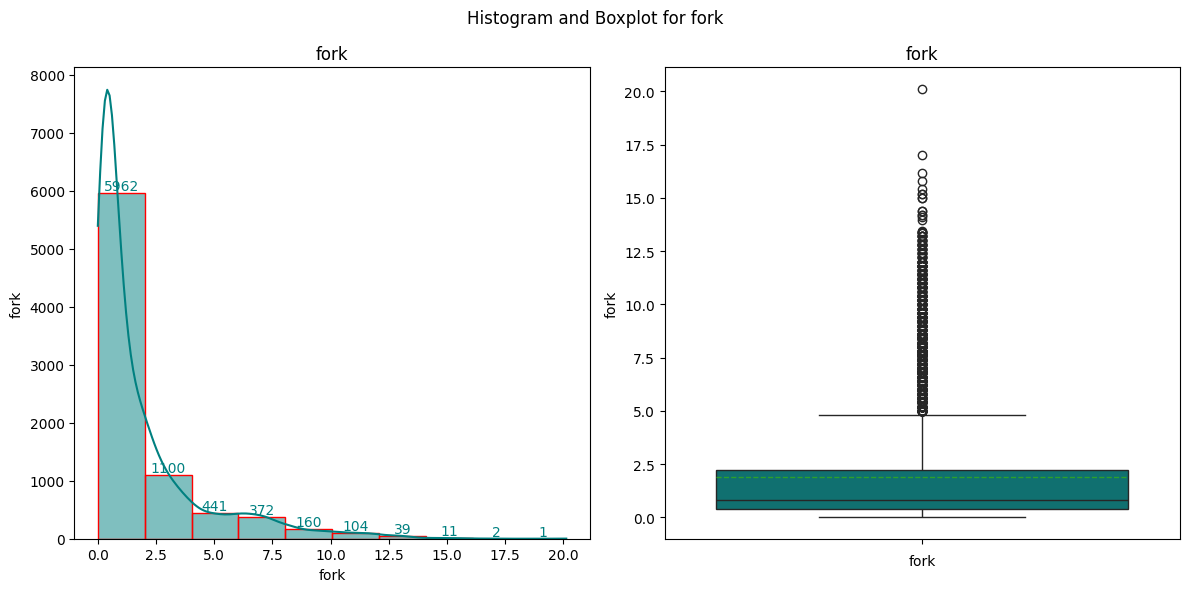

Skewness: 2.2496891391571325
Statistical Summary count    8192.000000
mean        1.884554
std         2.479493
min         0.000000
25%         0.400000
50%         0.800000
75%         2.200000
max        20.120000
Name: fork, dtype: float64
________________________


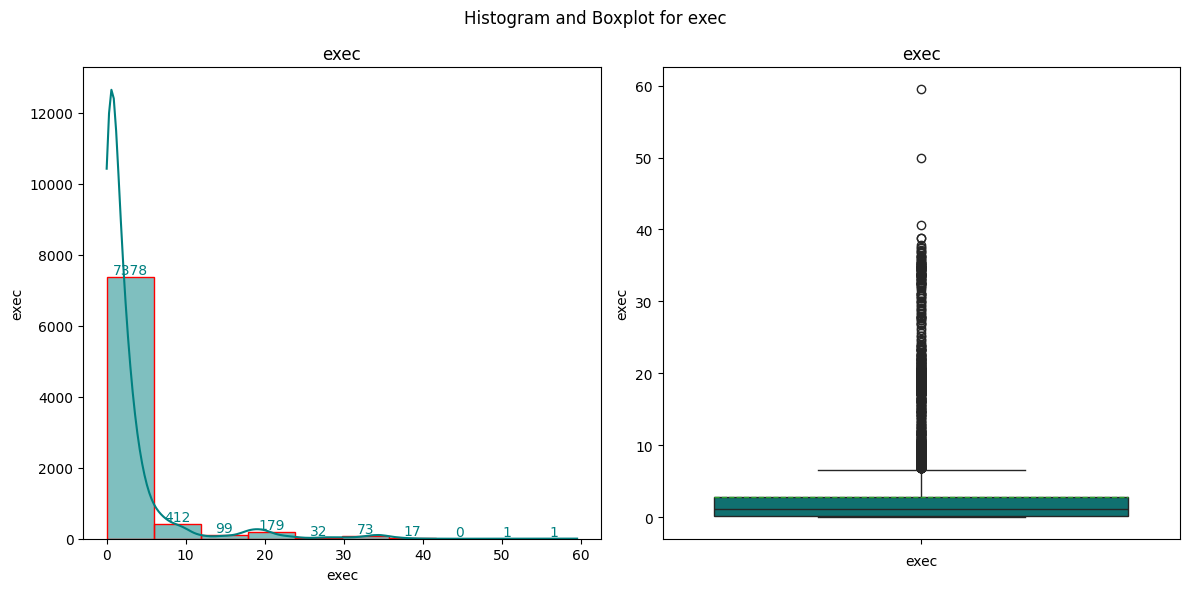

Skewness: 4.069237707552533
Statistical Summary count    8192.000000
mean        2.791998
std         5.212456
min         0.000000
25%         0.200000
50%         1.200000
75%         2.800000
max        59.560000
Name: exec, dtype: float64
________________________


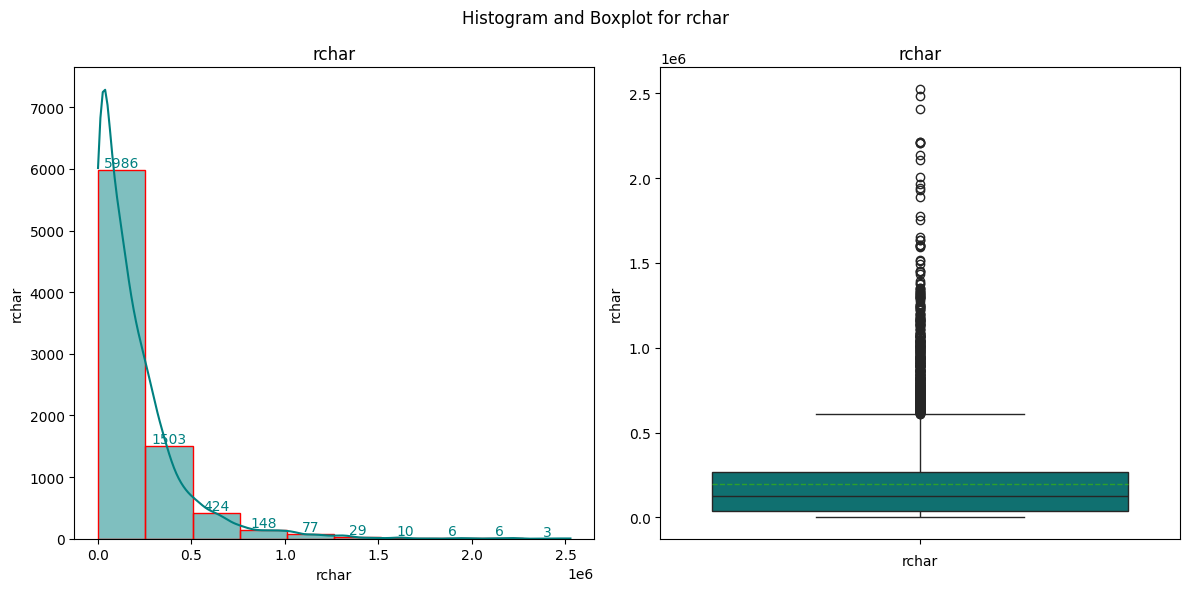

Skewness: 2.8785581933662114
Statistical Summary count    8.192000e+03
mean     1.964728e+05
std      2.384460e+05
min      2.780000e+02
25%      3.486050e+04
50%      1.254735e+05
75%      2.653948e+05
max      2.526649e+06
Name: rchar, dtype: float64
________________________


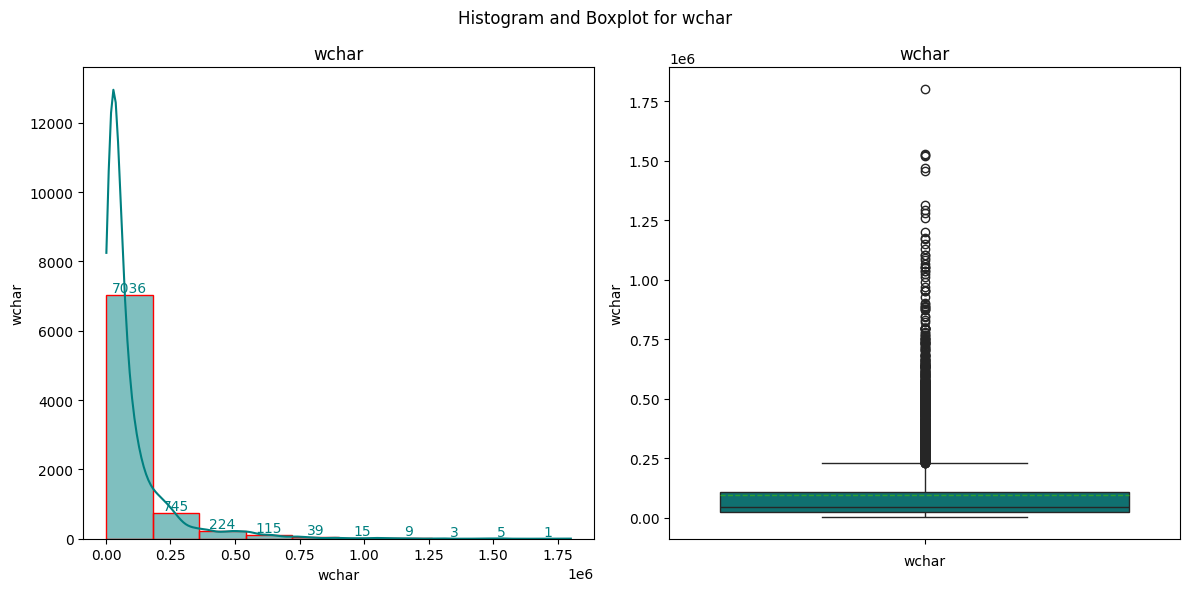

Skewness: 3.851730992818844
Statistical Summary count    8.192000e+03
mean     9.581275e+04
std      1.407285e+05
min      1.498000e+03
25%      2.297775e+04
50%      4.661900e+04
75%      1.060370e+05
max      1.801623e+06
Name: wchar, dtype: float64
________________________


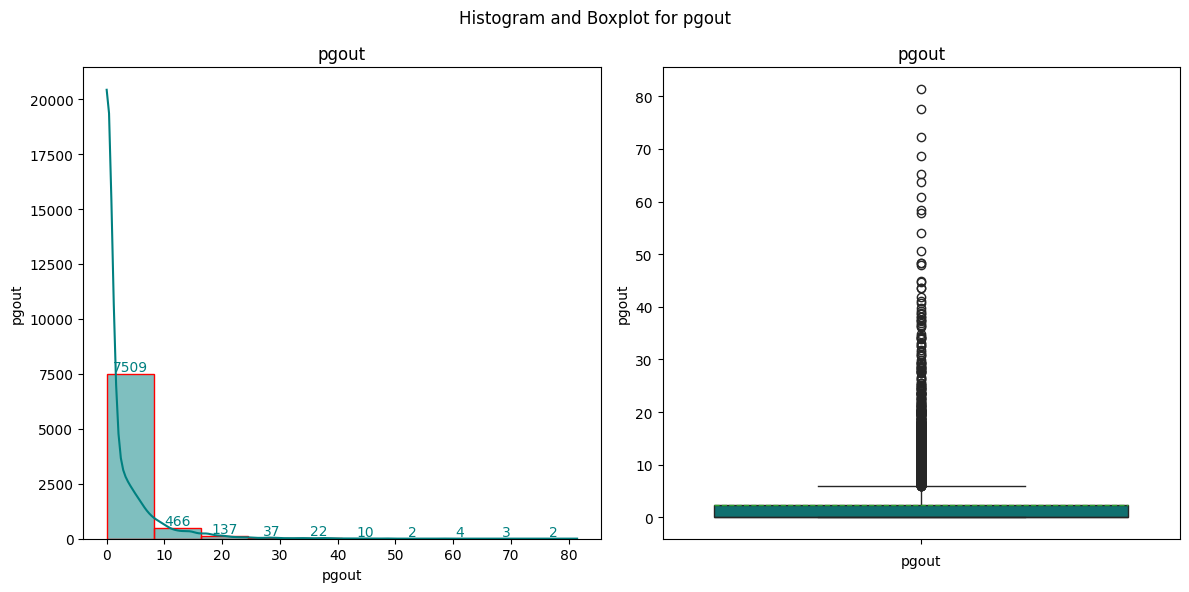

Skewness: 5.0669841185950535
Statistical Summary count    8192.000000
mean        2.285317
std         5.307038
min         0.000000
25%         0.000000
50%         0.000000
75%         2.400000
max        81.440000
Name: pgout, dtype: float64
________________________


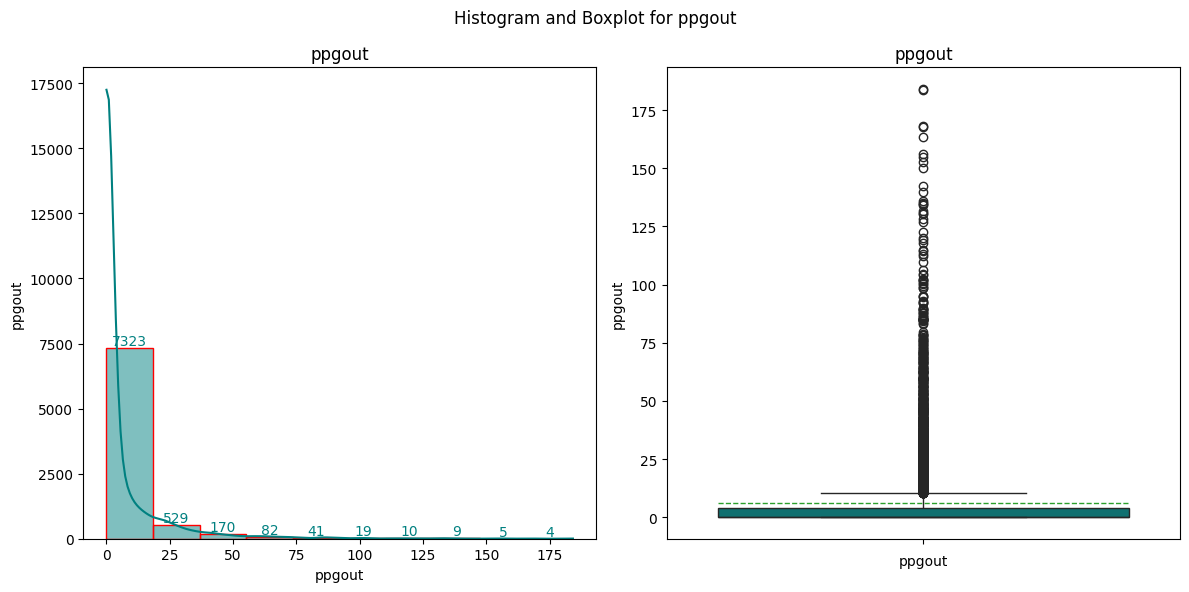

Skewness: 4.680441654574661
Statistical Summary count    8192.000000
mean        5.977229
std        15.214590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.200000
max       184.200000
Name: ppgout, dtype: float64
________________________


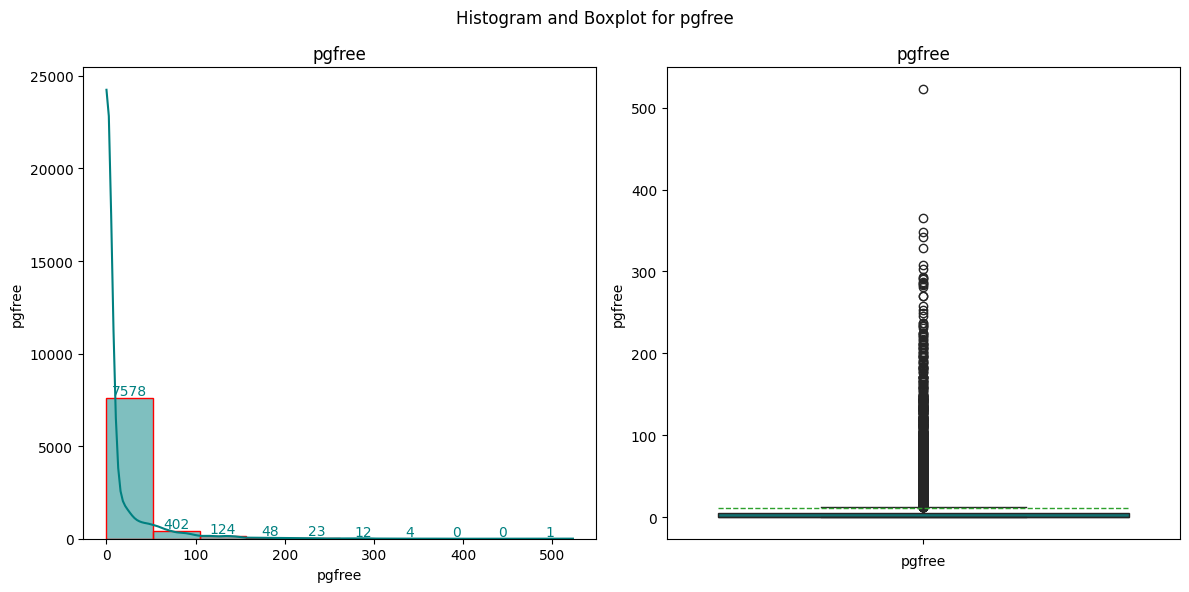

Skewness: 4.768191252103855
Statistical Summary count    8192.000000
mean       11.919712
std        32.363520
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       523.000000
Name: pgfree, dtype: float64
________________________


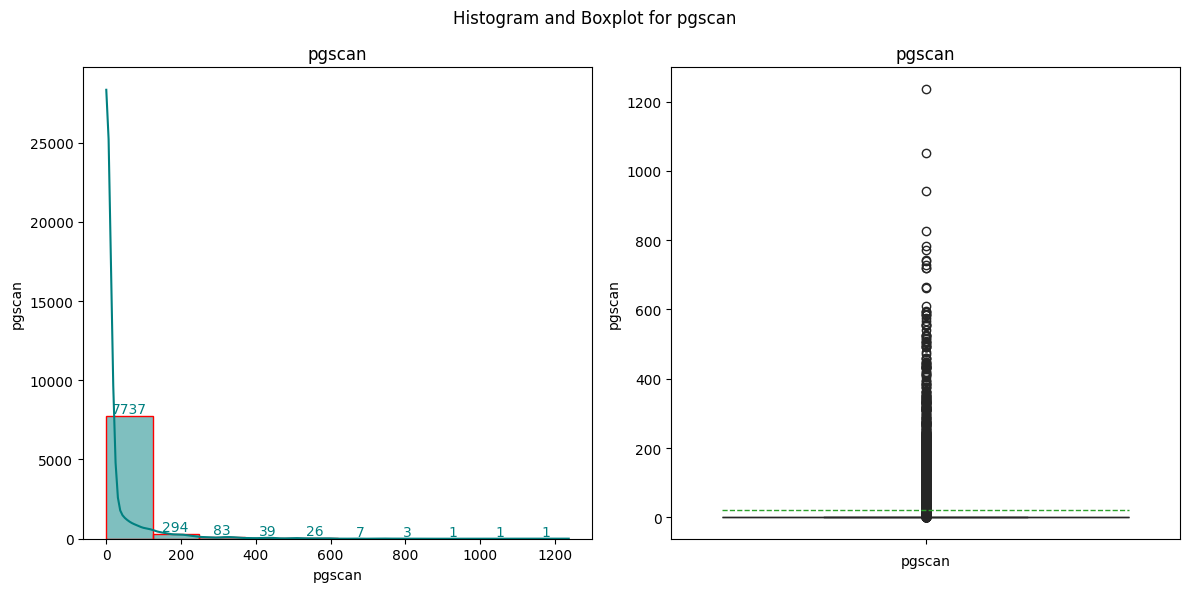

Skewness: 5.813415144064877
Statistical Summary count    8192.000000
mean       21.526849
std        71.141340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1237.000000
Name: pgscan, dtype: float64
________________________


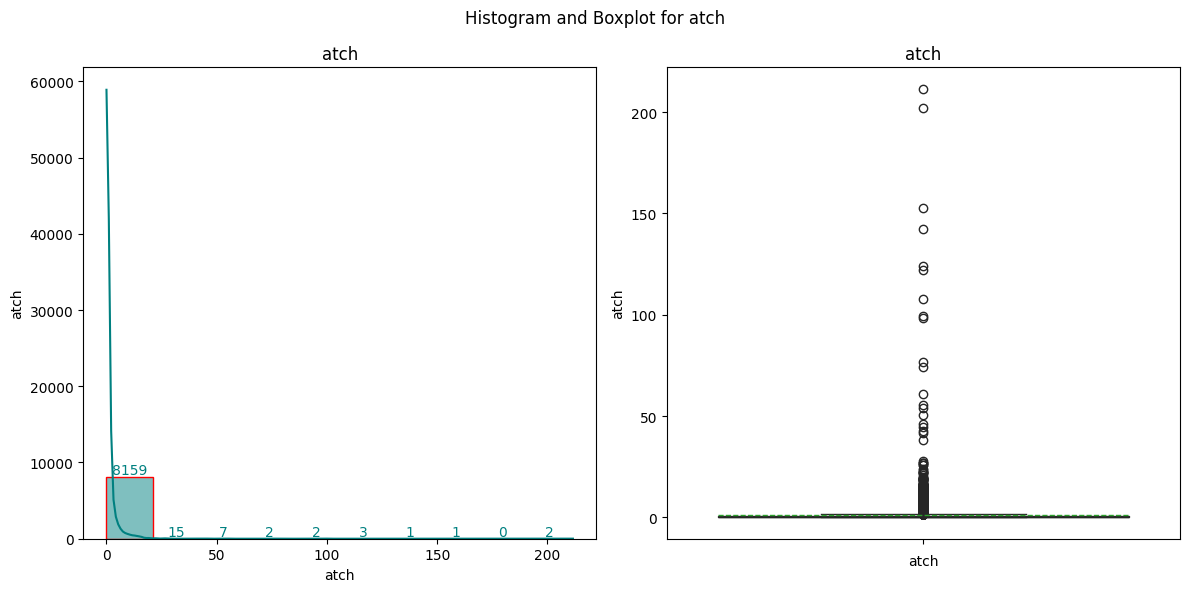

Skewness: 21.542019683247847
Statistical Summary count    8192.000000
mean        1.127505
std         5.708347
min         0.000000
25%         0.000000
50%         0.000000
75%         0.600000
max       211.580000
Name: atch, dtype: float64
________________________


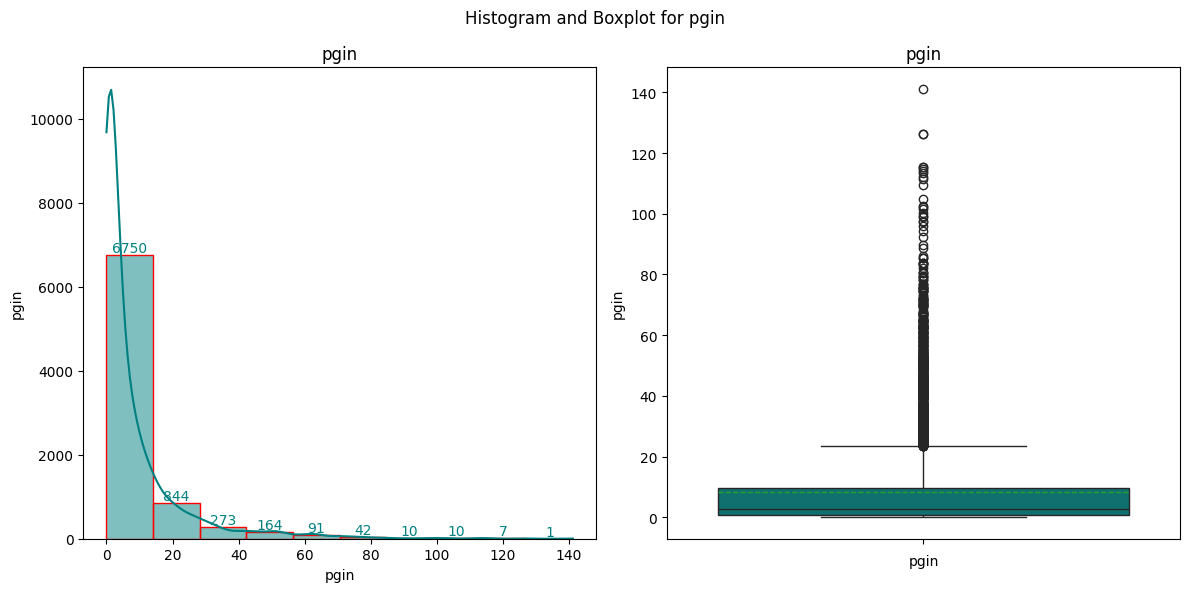

Skewness: 3.2424124762557356
Statistical Summary count    8192.000000
mean        8.277960
std        13.874978
min         0.000000
25%         0.600000
50%         2.800000
75%         9.765000
max       141.200000
Name: pgin, dtype: float64
________________________


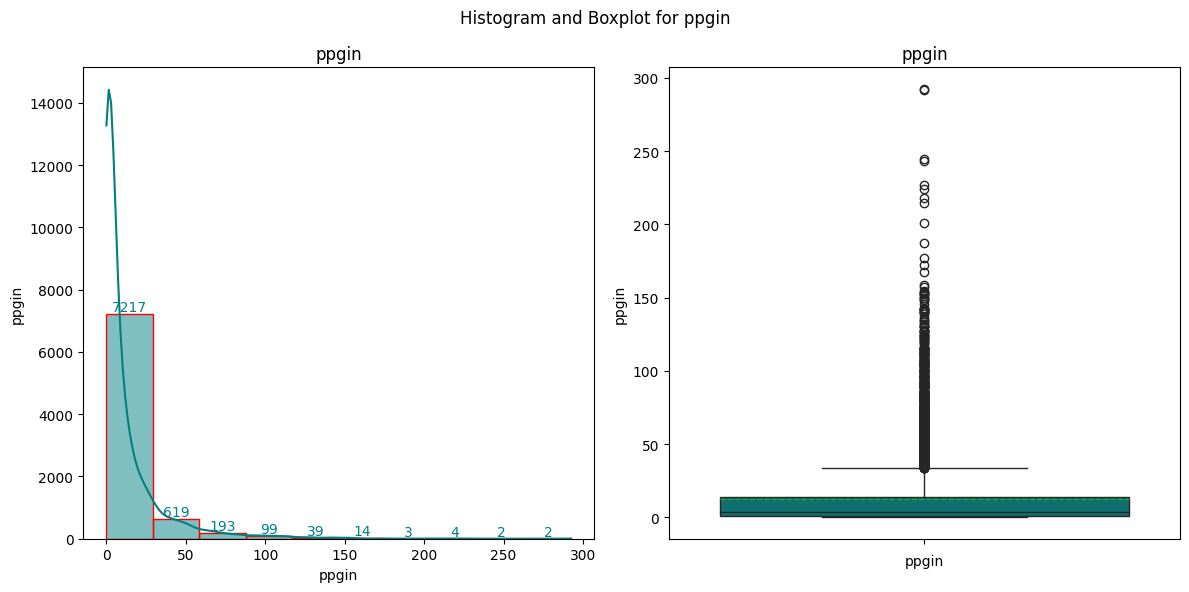

Skewness: 3.902764914157577
Statistical Summary count    8192.000000
mean       12.388586
std        22.281318
min         0.000000
25%         0.600000
50%         3.800000
75%        13.800000
max       292.610000
Name: ppgin, dtype: float64
________________________


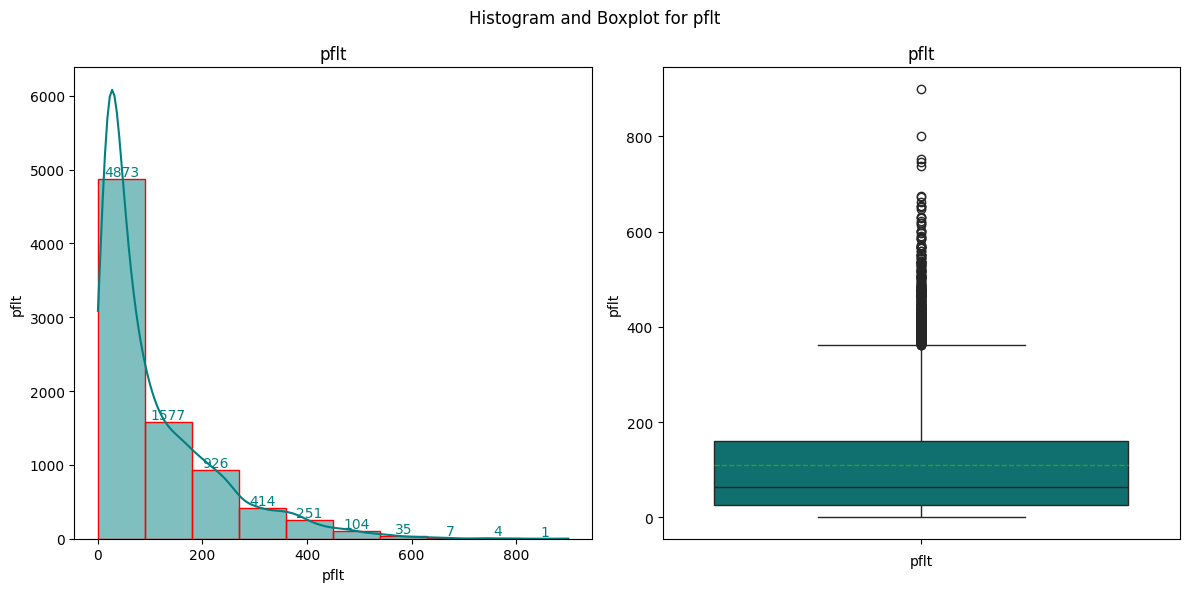

Skewness: 1.7202841192012033
Statistical Summary count    8192.000000
mean      109.793799
std       114.419221
min         0.000000
25%        25.000000
50%        63.800000
75%       159.600000
max       899.800000
Name: pflt, dtype: float64
________________________


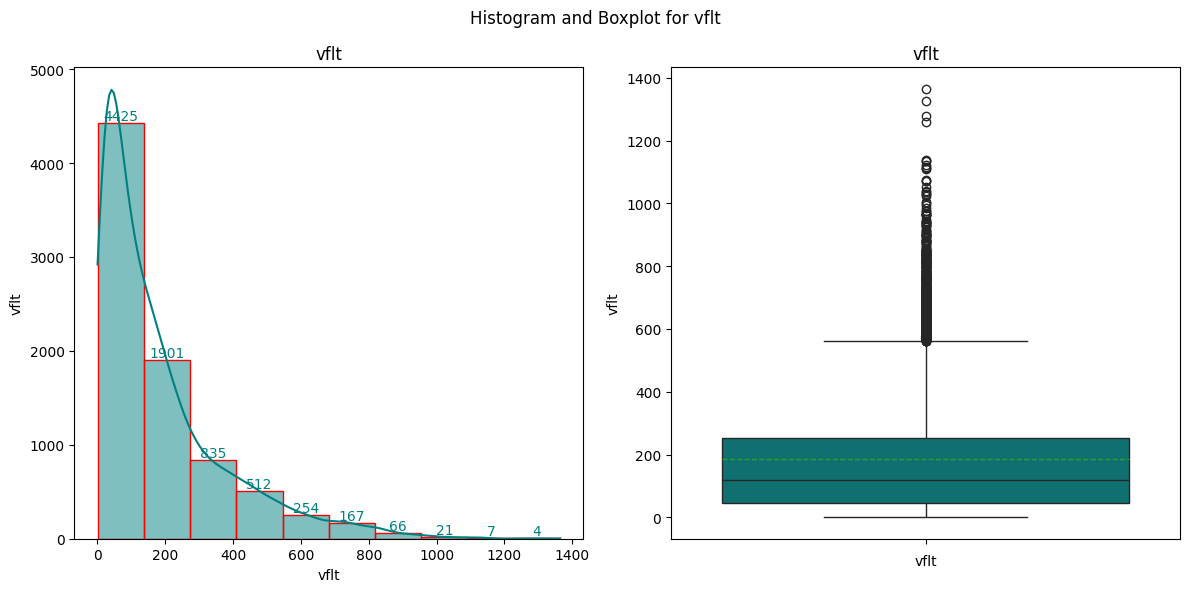

Skewness: 1.7373265929727528
Statistical Summary count    8192.000000
mean      185.315796
std       191.000603
min         0.200000
25%        45.400000
50%       120.400000
75%       251.800000
max      1365.000000
Name: vflt, dtype: float64
________________________


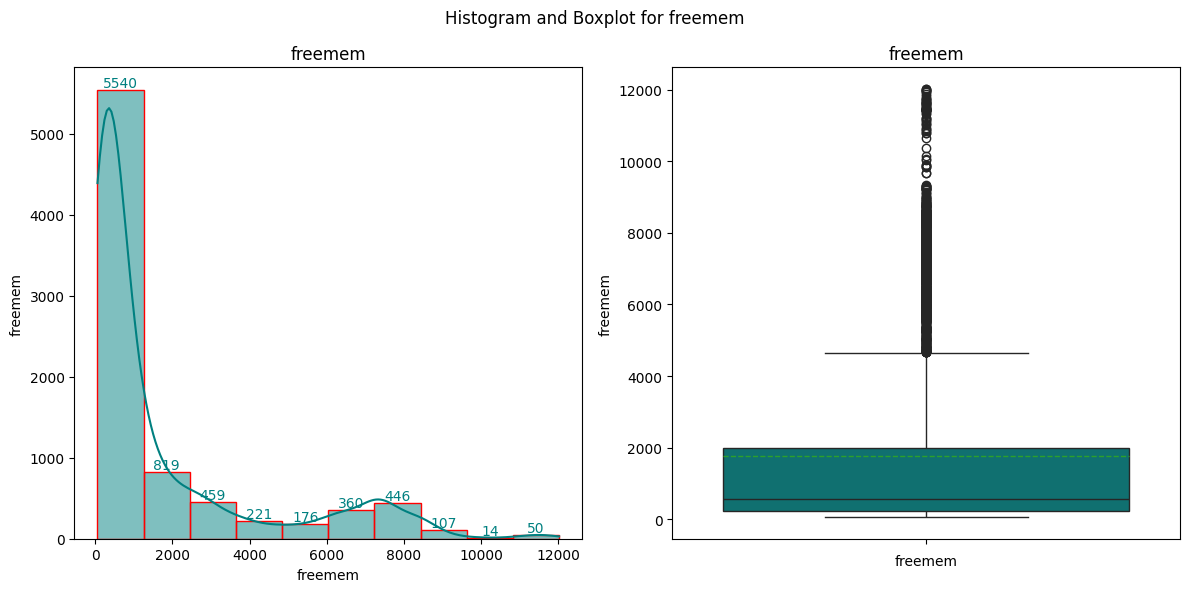

Skewness: 1.8075546533224125
Statistical Summary count     8192.000000
mean      1763.456299
std       2482.104511
min         55.000000
25%        231.000000
50%        579.000000
75%       2002.250000
max      12027.000000
Name: freemem, dtype: float64
________________________


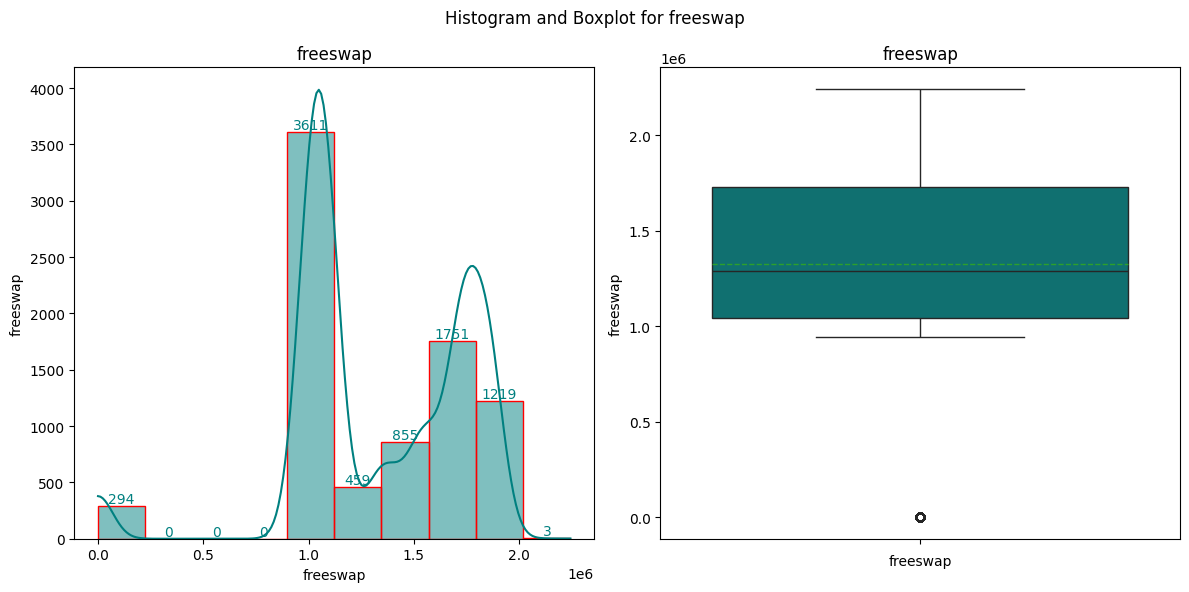

Skewness: -0.7916644438525977
Statistical Summary count    8.192000e+03
mean     1.328126e+06
std      4.220194e+05
min      2.000000e+00
25%      1.042624e+06
50%      1.289290e+06
75%      1.730380e+06
max      2.243187e+06
Name: freeswap, dtype: float64
________________________


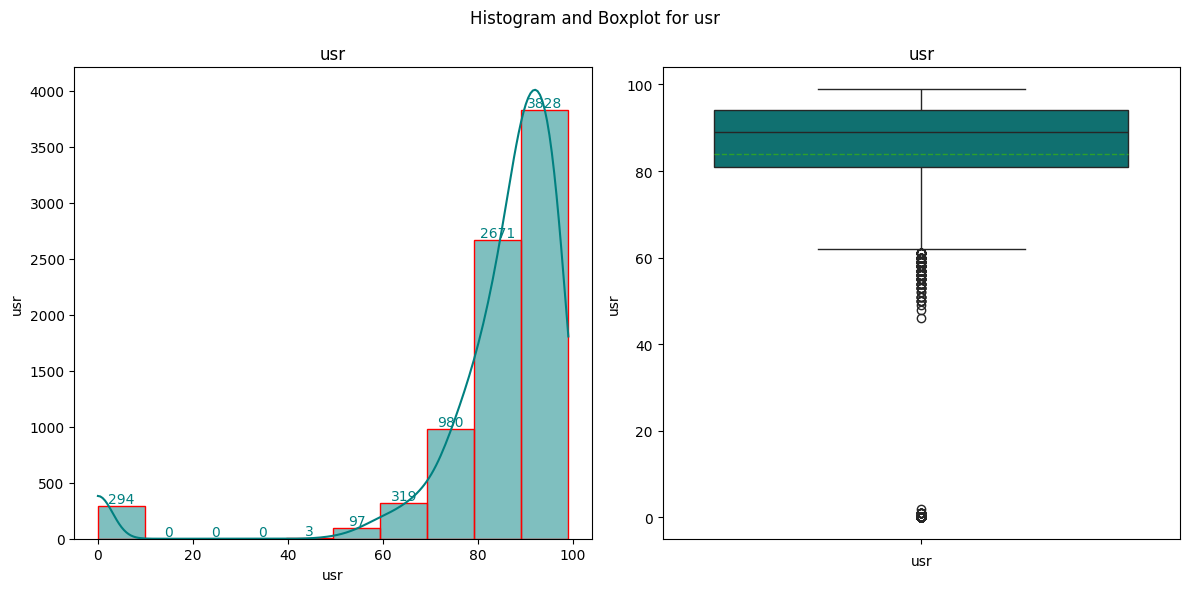

Skewness: -3.4167496030437094
Statistical Summary count    8192.000000
mean       83.968872
std        18.401905
min         0.000000
25%        81.000000
50%        89.000000
75%        94.000000
max        99.000000
Name: usr, dtype: float64
________________________


In [ ]:
#For loop for the distibution of the Numerical Values
for column in df_num.columns:
  histogram_boxplot(df_num, column)
  print("Skewness:", df_num[column].skew())
  print("Statistical Summary", df_num[column].describe())
  print("________________________")

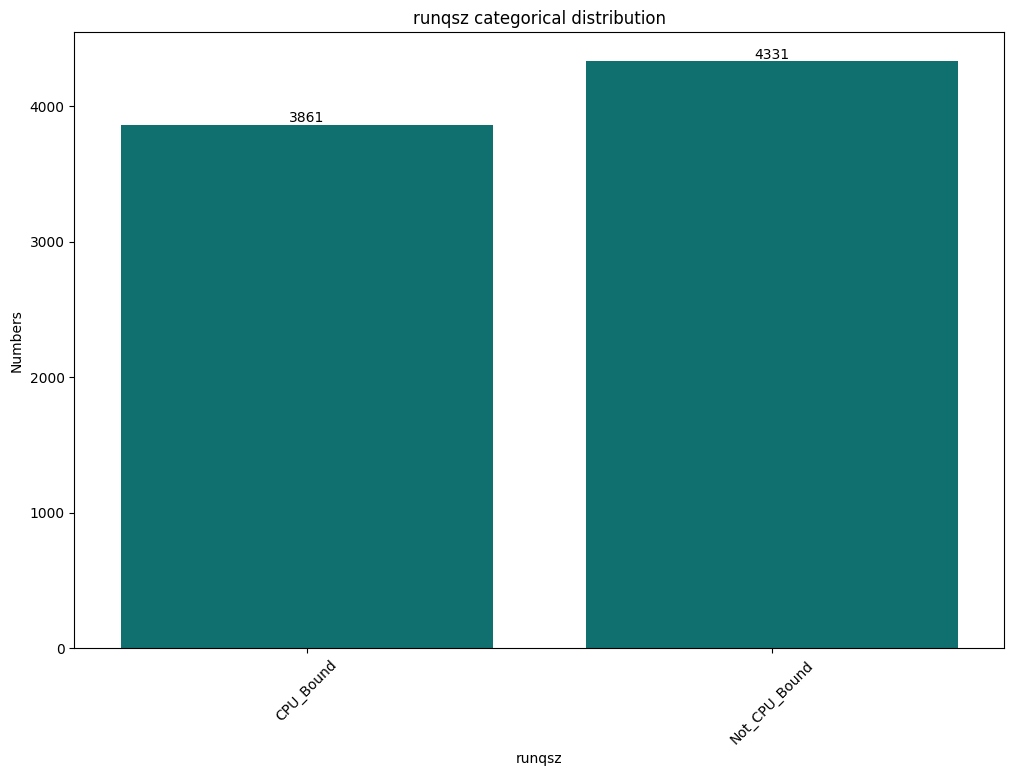

In [ ]:
#BarPlot
plt.figure(figsize=(12,8))
a1=sns.countplot(x=df['runqsz'], color="teal")
#a1=sns.boxplot(x=df['runqsz'], color="teal")
a1.bar_label(a1.containers[0])
a1.set_xlabel("runqsz")
a1.set_ylabel("Numbers")
a1.set_title("runqsz")
#set title of graph
plt.title("runqsz categorical distribution")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#percantage of cpu bound
df["runqsz"].value_counts(normalize=True)

runqsz
Not_CPU_Bound    0.528687
CPU_Bound        0.471313
Name: proportion, dtype: float64

Multivarient Analysis

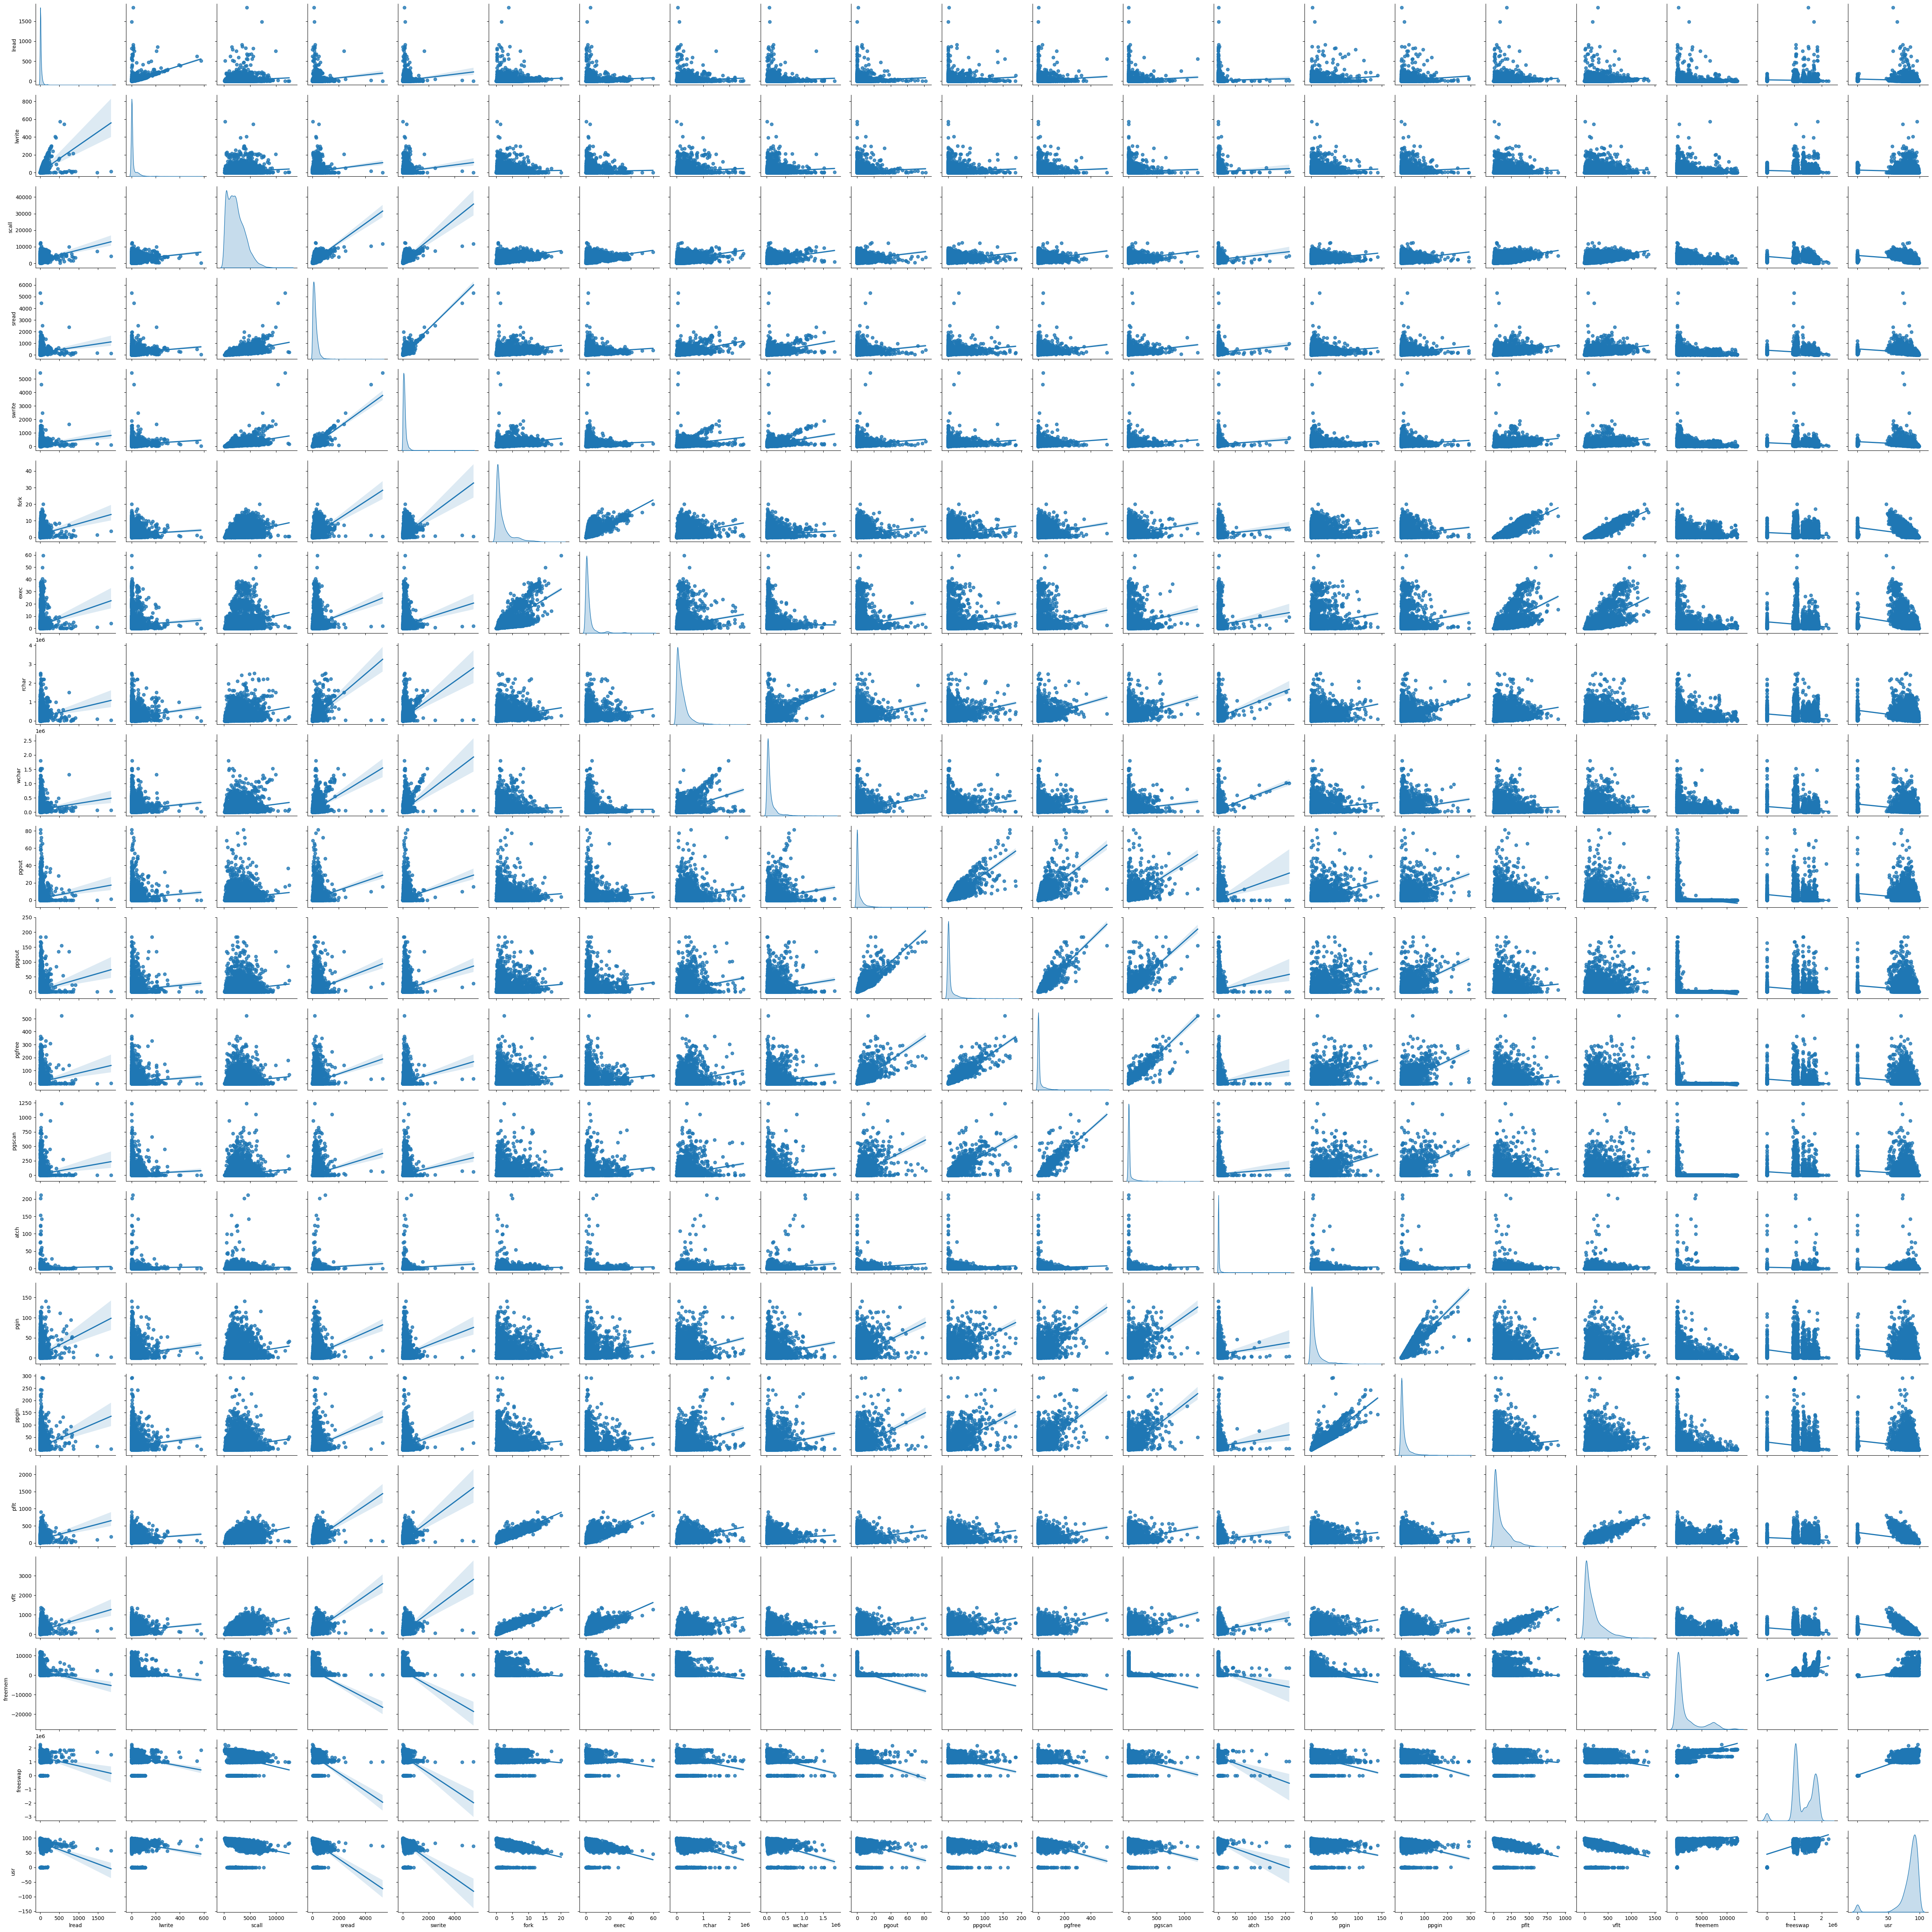

In [ ]:
#BarPlot
#plt.figure(figsize=(12,8))
sns.pairplot(df_num, kind="reg", diag_kind="kde")
#a1.bar_label(a1.containers[0])
#a1.set_xlabel("usr")
#a1.set_ylabel("usr")
#a1.set_title("use")
#plt.xticks(rotation=45)
plt.show()

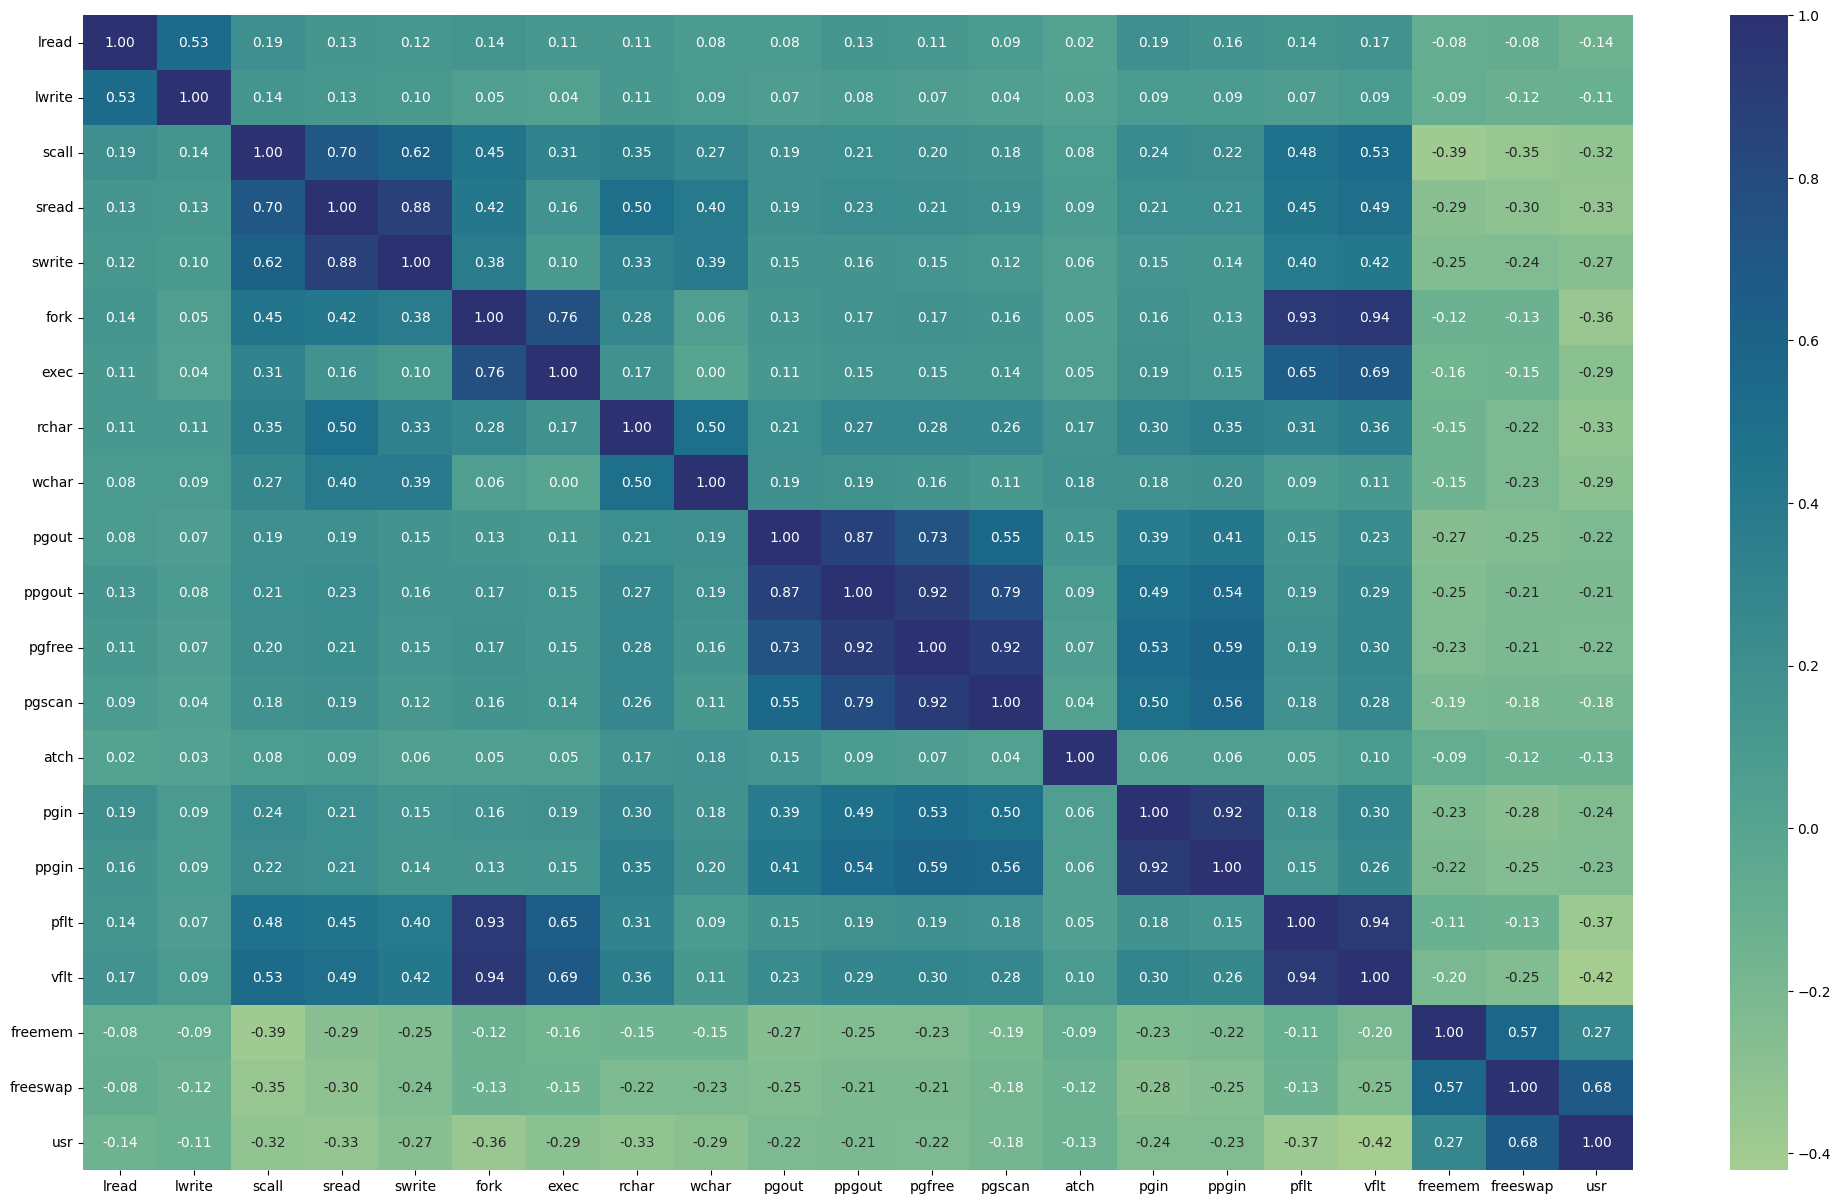

In [ ]:
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f', cmap="crest")
plt.show()

In [ ]:
#correalion between variable
round(df_num.corr(),2)

lread  lwrite  scall  sread  swrite  fork  exec  rchar  wchar  \
lread      1.00    0.53   0.19   0.13    0.12  0.14  0.11   0.11   0.08   
lwrite     0.53    1.00   0.14   0.13    0.10  0.05  0.04   0.11   0.09   
scall      0.19    0.14   1.00   0.70    0.62  0.45  0.31   0.35   0.27   
sread      0.13    0.13   0.70   1.00    0.88  0.42  0.16   0.50   0.40   
swrite     0.12    0.10   0.62   0.88    1.00  0.38  0.10   0.33   0.39   
fork       0.14    0.05   0.45   0.42    0.38  1.00  0.76   0.28   0.06   
exec       0.11    0.04   0.31   0.16    0.10  0.76  1.00   0.17   0.00   
rchar      0.11    0.11   0.35   0.50    0.33  0.28  0.17   1.00   0.50   
wchar      0.08    0.09   0.27   0.40    0.39  0.06  0.00   0.50   1.00   
pgout      0.08    0.07   0.19   0.19    0.15  0.13  0.11   0.21   0.19   
ppgout     0.13    0.08   0.21   0.23    0.16  0.17  0.15   0.27   0.19   
pgfree     0.11    0.07   0.20   0.21    0.15  0.17  0.15   0.28   0.16   
pgscan     0.09    0.04   0.18   0.19    0.12  0.16  0.14   0.26   0.11   
atch       0.02    0.03   0.08   0.09    0.06  0.05  0.05   0.17   0.18   
pgin       0.19    0.09   0.24   0.21    0.15  0.16  0.19   0.30   0.18   
ppgin      0.16    0.09   0.22   0.21    0.14  0.13  0.15   0.35   0.20   
pflt       0.14    0.07   0.48   0.45    0.40  0.93  0.65   0.31   0.09   
vflt       0.17    0.09   0.53   0.49    0.42  0.94  0.69   0.36   0.11   
freemem   -0.08   -0.09  -0.39  -0.29   -0.25 -0.12 -0.16  -0.15  -0.15   
freeswap  -0.08   -0.12  -0.35  -0.30   -0.24 -0.13 -0.15  -0.22  -0.23   
usr       -0.14   -0.11  -0.32  -0.33   -0.27 -0.36 -0.29  -0.33  -0.29   

          pgout  ...  pgfree  pgscan  atch  pgin  ppgin  pflt  vflt  freemem  \
lread      0.08  ...    0.11    0.09  0.02  0.19   0.16  0.14  0.17    -0.08   
lwrite     0.07  ...    0.07    0.04  0.03  0.09   0.09  0.07  0.09    -0.09   
scall      0.19  ...    0.20    0.18  0.08  0.24   0.22  0.48  0.53    -0.39   
sread      0.19  ...    0.21    0.19  0.09  0.21   0.21  0.45  0.49    -0.29   
swrite     0.15  ...    0.15    0.12  0.06  0.15   0.14  0.40  0.42    -0.25   
fork       0.13  ...    0.17    0.16  0.05  0.16   0.13  0.93  0.94    -0.12   
exec       0.11  ...    0.15    0.14  0.05  0.19   0.15  0.65  0.69    -0.16   
rchar      0.21  ...    0.28    0.26  0.17  0.30   0.35  0.31  0.36    -0.15   
wchar      0.19  ...    0.16    0.11  0.18  0.18   0.20  0.09  0.11    -0.15   
pgout      1.00  ...    0.73    0.55  0.15  0.39   0.41  0.15  0.23    -0.27   
ppgout     0.87  ...    0.92    0.79  0.09  0.49   0.54  0.19  0.29    -0.25   
pgfree     0.73  ...    1.00    0.92  0.07  0.53   0.59  0.19  0.30    -0.23   
pgscan     0.55  ...    0.92    1.00  0.04  0.50   0.56  0.18  0.28    -0.19   
atch       0.15  ...    0.07    0.04  1.00  0.06   0.06  0.05  0.10    -0.09   
pgin       0.39  ...    0.53    0.50  0.06  1.00   0.92  0.18  0.30    -0.23   
ppgin      0.41  ...    0.59    0.56  0.06  0.92   1.00  0.15  0.26    -0.22   
pflt       0.15  ...    0.19    0.18  0.05  0.18   0.15  1.00  0.94    -0.11   
vflt       0.23  ...    0.30    0.28  0.10  0.30   0.26  0.94  1.00    -0.20   
freemem   -0.27  ...   -0.23   -0.19 -0.09 -0.23  -0.22 -0.11 -0.20     1.00   
freeswap  -0.25  ...   -0.21   -0.18 -0.12 -0.28  -0.25 -0.13 -0.25     0.57   
usr       -0.22  ...   -0.22   -0.18 -0.13 -0.24  -0.23 -0.37 -0.42     0.27   

          freeswap   usr  
lread        -0.08 -0.14  
lwrite       -0.12 -0.11  
scall        -0.35 -0.32  
sread        -0.30 -0.33  
swrite       -0.24 -0.27  
fork         -0.13 -0.36  
exec         -0.15 -0.29  
rchar        -0.22 -0.33  
wchar        -0.23 -0.29  
pgout        -0.25 -0.22  
ppgout       -0.21 -0.21  
pgfree       -0.21 -0.22  
pgscan       -0.18 -0.18  
atch         -0.12 -0.13  
pgin         -0.28 -0.24  
ppgin        -0.25 -0.23  
pflt         -0.13 -0.37  
vflt         -0.25 -0.42  
freemem       0.57  0.27  
freeswap      1.00  0.68  
usr           0.68  1.00  

[21

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatterplot(dataframe, x_var, y_var):

  sns.scatterplot(data=dataframe, x=x_var, y=y_var)
  plt.show()

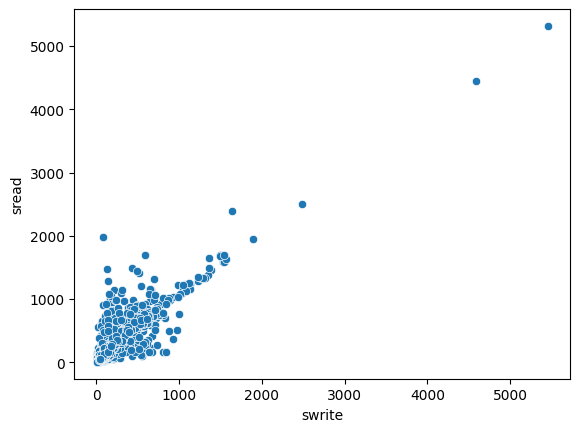

In [ ]:
scatterplot(df_num,df_num["swrite"],df_num["sread"])

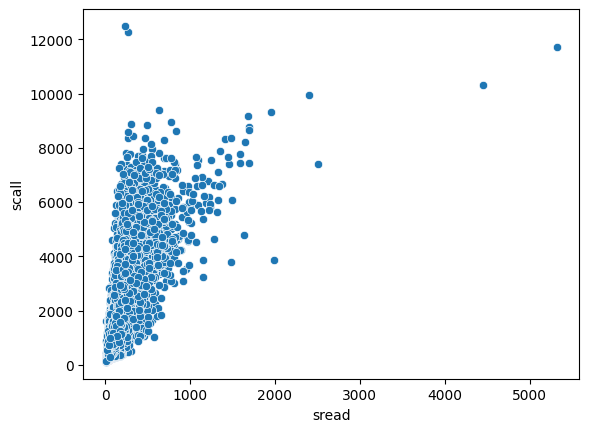

In [ ]:
scatterplot(df_num,df_num["sread"],df_num["scall"])

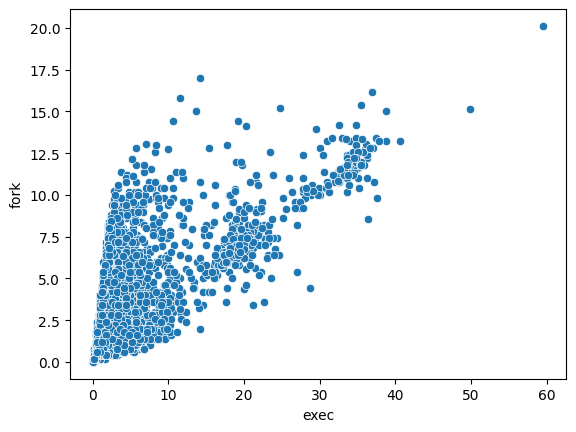

In [ ]:
scatterplot(df_num,df_num["exec"],df_num["fork"])

Data Pre-processing
Prepare the data for modelling: - Missing Value Treatment (if needed) - Outlier Detection (treat, if needed) - Feature Engineering - Encode the data - Train-test split

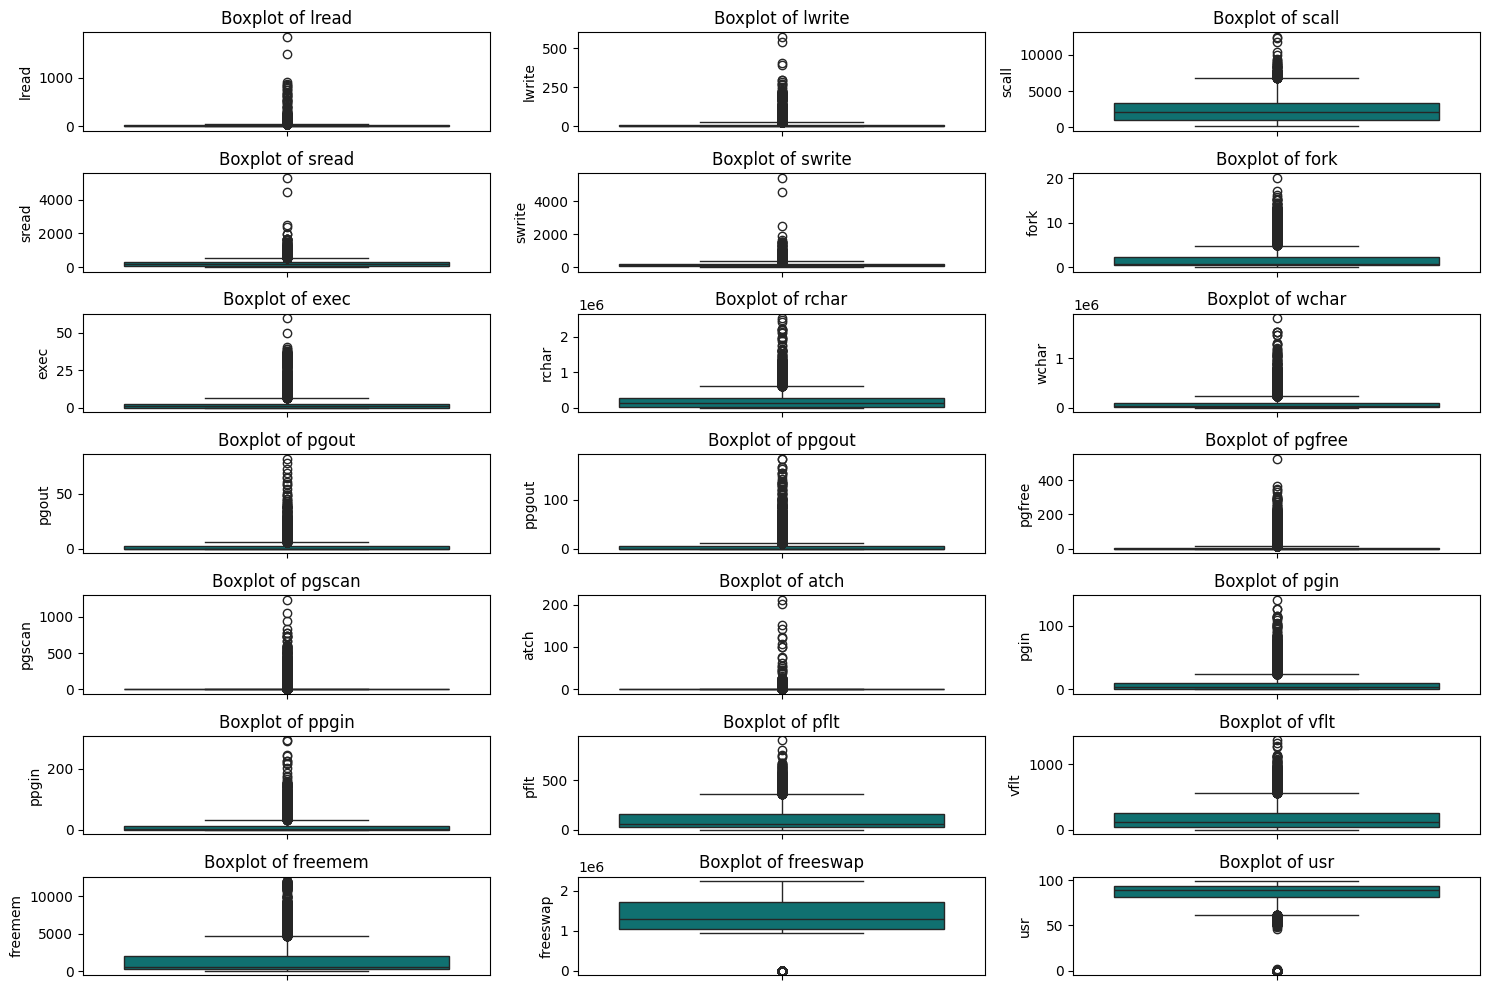

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,10))
feature_list = df_num.columns #insert
for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num, color="teal") #insert
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#

In [ ]:
#null value
df.isnull().sum()[lambda x:x>0]

rchar    104
wchar     15
dtype: int64

In [ ]:
#replace the missing value with the median
df["rchar"]=df["rchar"].fillna(df["rchar"].median())
df["wchar"]=df["wchar"].fillna(df["wchar"].median())

In [ ]:
#null value
df.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
#function counts the number of outliers in a particular column of a dataframe
def count_outliers(df, col):
  Q1, Q3 = df[col].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  outliers = df[((df[col] < lower_range) | (df[col] > upper_range))]
  return len(outliers)

In [ ]:
#For Loop to found the Number of Outler in each column with the percantage of the Outlier in a particular column
for column in df_num:
    print(column)
    print(count_outliers(df_num, column))
    print("Percentage of Outlier with the  Original Datset", round((count_outliers(df_num, column)/len(df_num))*100,2))
    print(df_num[column].skew())
    print("__________________________")

lread
753
Percentage of Outlier with the  Original Datset 9.19
13.897852242774922
__________________________
lwrite
1305
Percentage of Outlier with the  Original Datset 15.93
5.27764452621306
__________________________
scall
108
Percentage of Outlier with the  Original Datset 1.32
0.9025312213201333
__________________________
sread
340
Percentage of Outlier with the  Original Datset 4.15
5.459465962452425
__________________________
swrite
495
Percentage of Outlier with the  Original Datset 6.04
9.605843698195871
__________________________
fork
943
Percentage of Outlier with the  Original Datset 11.51
2.2496891391571325
__________________________
exec
710
Percentage of Outlier with the  Original Datset 8.67
4.069237707552533
__________________________
rchar
465
Percentage of Outlier with the  Original Datset 5.68
2.8785581933662114
__________________________
wchar
817
Percentage of Outlier with the  Original Datset 9.97
3.851730992818844
__________________________
pgout
988
Percentage o

In [ ]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
#Cap & floor the values beyond the outlier boundaries
feature_list = df_num.columns
for i in df_num.columns:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

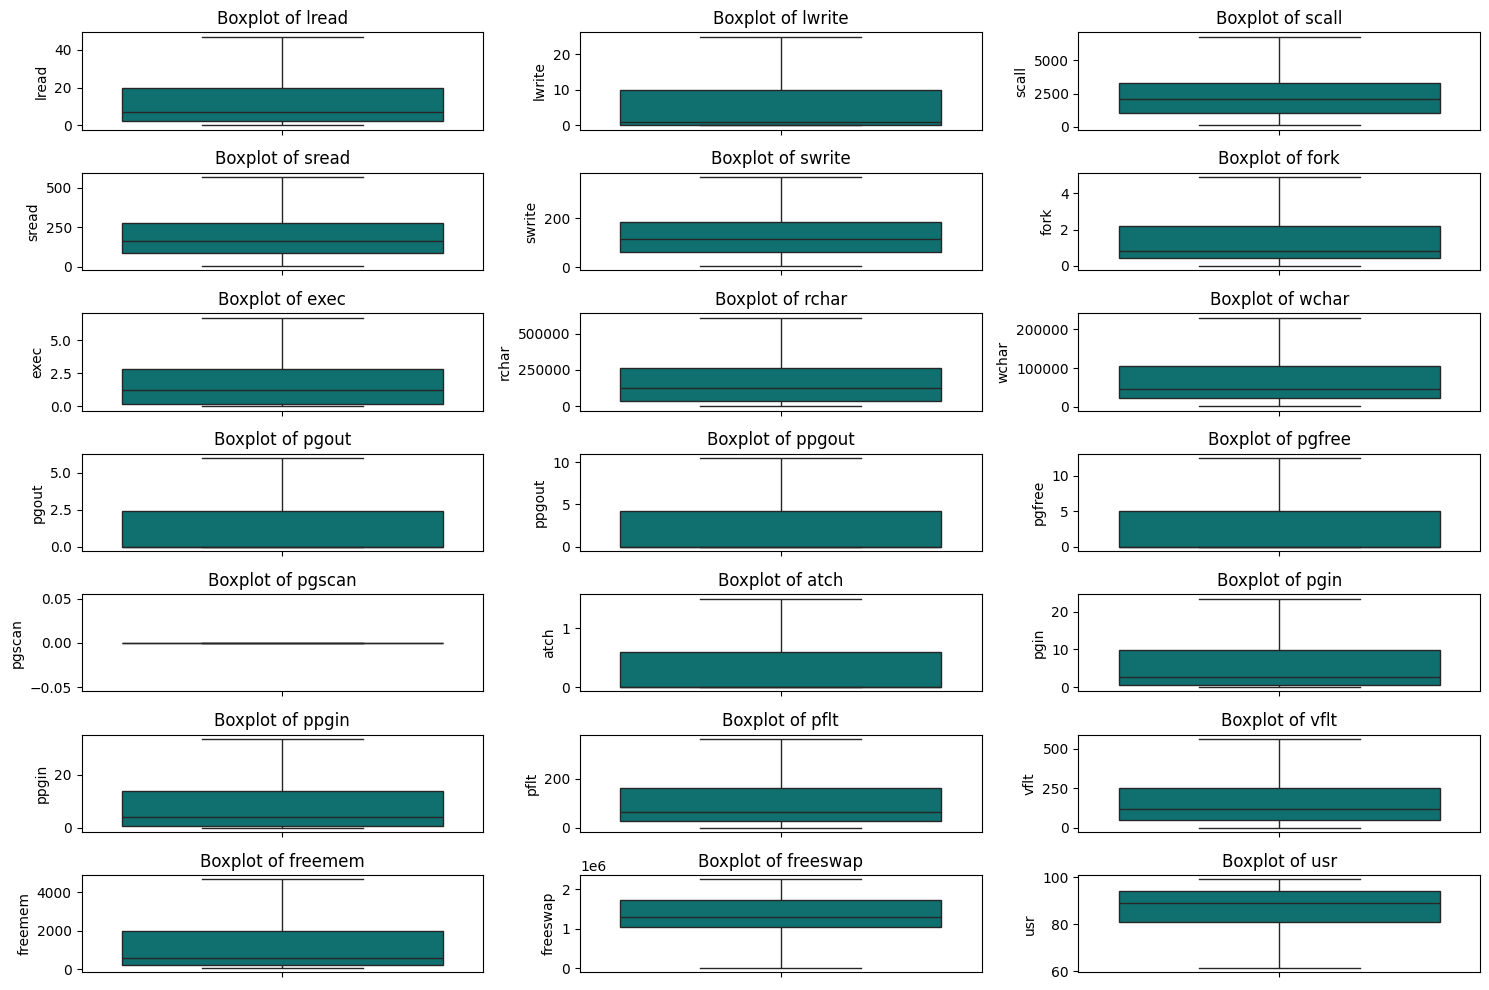

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,10))
feature_list = df_num.columns #insert
for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num, color="teal") #insert
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

"Since there are no data points that appear to be anomalies, we will not be treating any outliers in the dataset" and so Prevent  the models to lose out on generalization

Encoding of categorical variable

* runqsz

Split Data

split X and y into train and test sets in a 70:30 ratio.

Lets Do feature Engineering:

In [ ]:
#subset of the Numeric Data type
df1=df_num.copy()

In [ ]:
df1.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [ ]:
df1.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
#Calculate the difference between 'lread' and 'lwrite' to capture the balance between input and output operations.
df1["OI_bal"]=df1["lread"]-df1["lwrite"]

In [ ]:
#Calculate the total number of system calls per second by summing 'scall', 'sread', 'swrite', 'fork', 'exec', and other system call-related features.
df1["Total_Call"]=df1["scall"]+df1["sread"]+df1["swrite"]+df1["fork"]+df1["exec"]

In [ ]:
#memory_utilization: Calculate the ratio of 'freemem' to the total memory available to user processes.
df1["memory_utilization"]=df1["freemem"]/df1["freeswap"]

In [ ]:
#page_fault_rate: Calculate the total number of page faults per second by summing 'pflt' and 'vflt'.
df1["page_fault_rate"]=df1["pflt"]+df1["vflt"]

In [ ]:
#read_write_correlation: Calculate the correlation coefficient between 'lread' and 'lwrite' to capture the relationship between input and output operations.
df1["read_write_correlation"]=df1["lread"].corr(df1["lwrite"])

In [ ]:
#system_call_correlation: Calculate the correlation coefficient between different system call features (e.g., 'scall' and 'sread') to capture the relationships between different types of system calls.
df1["system_call_correlation"]=df1["scall"].corr(df1["sread"])

In [ ]:
#memory_access_pattern: Create a feature that captures the memory access pattern by combining 'rchar' and 'wchar' into a single feature
df1["memory_access_pattern"]=df1["rchar"]+df1["wchar"]

In [ ]:
#system_load: Calculate a system load feature by combining 'pgout', 'ppgout', 'pgfree', and 'pgscan' to capture the overall system load.
df1["system_load"]=df1["pgout"]+df1["ppgout"]+df1["pgscan"] #df1["pgfree"]is missing

In [ ]:
df1.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'OI_bal', 'Total_Call',
       'memory_utilization', 'page_fault_rate', 'read_write_correlation',
       'system_call_correlation', 'memory_access_pattern', 'system_load'],
      dtype='object')

In [ ]:
#drop variable which are get into the Featured Characterstics
df1.drop(["lread", "lwrite", "scall", "sread", "swrite","fork", "exec","freemem", "freeswap","pflt", "vflt", "rchar", "wchar", "pgout", "ppgout", "pgscan" ] , axis=1, inplace=True)#df1["pgfree"]is missing

In [ ]:
df1.head()

pgfree  atch  pgin  ppgin   usr  OI_bal  Total_Call  memory_utilization  \
0     0.0   0.0   1.6    2.6  95.0     1.0      2294.4            0.002698   
1     0.0   0.0   0.0    0.0  97.0     0.0       209.4            0.003894   
2     0.0   1.2   6.0    9.4  87.0    12.0      2444.4            0.000687   
3     0.0   0.0   0.2    0.2  98.0     0.0       188.4            0.003889   
4     0.0   0.0   1.0    1.2  90.0     4.0       407.8            0.000360   

   page_fault_rate  read_write_correlation  system_call_correlation  \
0            42.40                0.533737                 0.696887   
1            32.46                0.533737                 0.696887   
2           370.40                0.533737                 0.696887   
3            32.40                0.533737                 0.696887   
4            85.40                0.533737                 0.696887   

   memory_access_pattern  system_load  
0                94666.0          0.0  
1                 8833.0          0.0  
2               157423.5          0.0  
3               134143.5          0.0  
4               137658.5          0.0

In [ ]:
#export the data to csv file
df1.to_csv("df1.csv")

In [ ]:
df2=df1.copy()

In [ ]:
#top five rows
df2.head()

pgfree  atch  pgin  ppgin   usr  OI_bal  Total_Call  memory_utilization  \
0     0.0   0.0   1.6    2.6  high     1.0      2294.4            0.002692   
1     0.0   0.0   0.0    0.0  high     0.0       209.4            0.002493   
2     0.0   1.2   6.0    9.4  high    12.0      2444.4            0.000687   
3     0.0   0.0   0.2    0.2  high     0.0       188.4            0.002500   
4     0.0   0.0   1.0    1.2  high     4.0       407.8            0.000360   

   page_fault_rate  read_write_correlation  system_call_correlation  \
0            42.40                0.834674                 0.763001   
1            32.46                0.834674                 0.763001   
2           370.40                0.834674                 0.763001   
3            32.40                0.834674                 0.763001   
4            85.40                0.834674                 0.763001   

   memory_access_pattern  system_load  
0                94666.0          0.0  
1                 8833.0          0.0  
2               157423.5          0.0  
3               134143.5          0.0  
4               137658.5          0.0

In [ ]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

Encode of the Data

In [ ]:
#Make the Dummies of Object variable runqsz
df=pd.get_dummies(df,columns=["runqsz"])
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ppgout  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  \
0     0.0     0.0     0.0   0.0   1.6    2.6   16.00   26.40     4670   
1     0.0     0.0     0.0   0.0   0.0    0.0   15.63   16.83     7278   
2     0.0     0.0     0.0   1.2   6.0    9.4  150.20  220.20      702   
3     0.0     0.0     0.0   0.0   0.2    0.2   15.60   16.80     7248   
4     0.0     0.0     0.0   0.0   1.0    1.2   37.80   47.60      633   

   freeswap  usr  runqsz_CPU_Bound  runqsz_Not_CPU_Bound  
0   1730946   95              True                 False  
1   1869002   97             False                  True  
2   1021237   87             False                  True  
3   1863704   98             False                  True  
4   1760253   90             False                  True

In [ ]:
#
df2["runqsz_CPU_Bound"]=df["runqsz_CPU_Bound"].astype(int)

In [ ]:
df2.columns

Index(['pgfree', 'atch', 'pgin', 'ppgin', 'usr', 'OI_bal', 'Total_Call',
       'memory_utilization', 'page_fault_rate', 'read_write_correlation',
       'system_call_correlation', 'memory_access_pattern', 'system_load',
       'runqsz_CPU_Bound'],
      dtype='object')

In [ ]:
#head of df2
df2.head()

pgfree  atch  pgin  ppgin   usr  OI_bal  Total_Call  memory_utilization  \
0     0.0   0.0   1.6    2.6  95.0     1.0      2294.4            0.002698   
1     0.0   0.0   0.0    0.0  97.0     0.0       209.4            0.003894   
2     0.0   1.2   6.0    9.4  87.0    12.0      2444.4            0.000687   
3     0.0   0.0   0.2    0.2  98.0     0.0       188.4            0.003889   
4     0.0   0.0   1.0    1.2  90.0     4.0       407.8            0.000360   

   page_fault_rate  read_write_correlation  system_call_correlation  \
0            42.40                0.533737                 0.696887   
1            32.46                0.533737                 0.696887   
2           370.40                0.533737                 0.696887   
3            32.40                0.533737                 0.696887   
4            85.40                0.533737                 0.696887   

   memory_access_pattern  system_load  runqsz_CPU_Bound  
0                94666.0          0.0                 1  
1                 8833.0          0.0                 0  
2               157423.5          0.0                 0  
3               134143.5          0.0                 0  
4               137658.5          0.0                 0

Split Data with Train  - 70 and Test- 30,  70:30 ratio

In [ ]:
# independent variables with encoding
x = df2.drop(["usr"], axis=1)

In [ ]:
# dependent variable
Y = df2[["usr"]]

In [ ]:
#intercept of model, b0
X= sm.add_constant(x, has_constant='add')

In [ ]:
#Split Data with Train - 70 and Test- 30, 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

###Model Building - Linear regression
- Apply linear Regression using Sklearn - Using Statsmodels checks for significant variables  - Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare.

In [ ]:
#fit the model
olsmod = sm.OLS(Y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2487.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:52:12   Log-Likelihood:                -19709.
No. Observations:                5734   AIC:                         3.944e+04
Df Residuals:                    5722   BIC:                         3.952e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1.sort_values(ascending=False).to_string(float_format='{:.2f}'.format)))

VIF values: 

system_load               13.60
pgfree                    13.53
ppgin                      8.47
pgin                       7.51
Total_Call                 1.61
page_fault_rate            1.50
memory_access_pattern      1.41
runqsz_CPU_Bound           1.12
memory_utilization         1.06
OI_bal                     1.05
atch                       1.04
system_call_correlation    0.00
read_write_correlation     0.00
const                      0.00



The Vif indicates that **ppgin, pgin, system_load, pgfree **have VIF greater than 2 which shows are correlated with one or more independent features.

so we will remove them one by one

In [ ]:
#actual adj R-square = .826
act=.827

In [ ]:
#drop the system_load
X_train4 = X_train.drop(["system_load"], axis=1)
olsmod_3 = sm.OLS(Y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
    "\nChange by :",
    np.round((act-olsres_3.rsquared_adj), 3),
)

R-squared: 0.827 
Adjusted R-squared: 0.827 
Change by : 0.0


In [ ]:
#drop the pgfree
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_4 = sm.OLS(Y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
    "\nChange by :",
    np.round((act-olsres_4.rsquared_adj), 3),
)

R-squared: 0.827 
Adjusted R-squared: 0.827 
Change by : 0.0


In [ ]:
#drop the ppgin
X_train2 = X_train.drop(["pgin"], axis=1)
olsmod_1 = sm.OLS(Y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
    "\nChange by :",
    np.round((act-olsres_1.rsquared_adj), 3),
)

R-squared: 0.827 
Adjusted R-squared: 0.827 
Change by : 0.0


In [ ]:
#drop the pgin
X_train3 = X_train.drop(["pgin"], axis=1)
olsmod_2 = sm.OLS(Y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
    "\nChange by :",
    np.round((act-olsres_2.rsquared_adj), 3),
)

R-squared: 0.826 
Adjusted R-squared: 0.826 
Change by : -0.0


In [ ]:
#remove the system_load from the Train data set
X_train=X_train.drop(["system_load"], axis=1)

In [ ]:
olsmod5 = sm.OLS(Y_train, X_train)
olsres_5 = olsmod5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2735.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:53:45   Log-Likelihood:                -19710.
No. Observations:                5734   AIC:                         3.944e+04
Df Residuals:                    5723   BIC:                         3.952e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1.sort_values(ascending=False).to_string(float_format='{:.2f}'.format)))

VIF values: 

ppgin                     8.27
pgin                      7.42
pgfree                    1.67
Total_Call                1.61
page_fault_rate           1.49
memory_access_pattern     1.40
runqsz_CPU_Bound          1.12
memory_utilization        1.06
OI_bal                    1.04
atch                      1.04
system_call_correlation   0.00
read_write_correlation    0.00
const                     0.00



In [ ]:
#drop the ppgin
act=.827
X_train6 = X_train.drop(["ppgin"], axis=1)
olsmod_6 = sm.OLS(Y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
    "\nChange by :",
    np.round((act-olsres_6.rsquared_adj), 3),
)

R-squared: 0.827 
Adjusted R-squared: 0.826 
Change by : 0.001


Very little change shows by removing the variable ppgin =0.001

In [ ]:
#drop the pgin
act=.827
X_train7 = X_train.drop(["pgin"], axis=1)
olsmod_7 = sm.OLS(Y_train, X_train6)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
    "\nChange by :",
    np.round((act-olsres_7.rsquared_adj), 3),
)

R-squared: 0.827 
Adjusted R-squared: 0.826 
Change by : 0.001


since both have the same effect on the AdjR square value lets remove the ppgin from train dataset

---



In [ ]:
#remove the system_load from the Train data set
X_train=X_train.drop(["ppgin"], axis=1)

In [ ]:
olsmod_8 = sm.OLS(Y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3031.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:55:09   Log-Likelihood:                -19717.
No. Observations:                5734   AIC:                         3.945e+04
Df Residuals:                    5724   BIC:                         3.952e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1.sort_values(ascending=False).to_string(float_format='{:.2f}'.format)))

VIF values: 

Total_Call                1.61
pgin                      1.52
pgfree                    1.50
page_fault_rate           1.48
memory_access_pattern     1.35
runqsz_CPU_Bound          1.12
memory_utilization        1.06
OI_bal                    1.04
atch                      1.04
system_call_correlation   0.00
read_write_correlation    0.00
const                     0.00



Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables

No Variable have P value is not more than 5% significant value

In [ ]:
olsmod_8 = sm.OLS(Y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3031.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:57:35   Log-Likelihood:                -19717.
No. Observations:                5734   AIC:                         3.945e+04
Df Residuals:                    5724   BIC:                         3.952e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_8.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_8.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_8.params[i], "* (", X_train.columns[i], ")")

usr = 55.680874699643866 + -0.021799068808915342 * ( pgfree ) +  -0.1259181037657025 * ( atch ) +  -0.08961625008853764 * ( pgin ) +  -0.01026135524524409 * ( OI_bal ) +  -0.0012862557548909183 * ( Total_Call ) +  -7.65165957873435 * ( memory_utilization ) +  -0.019011175280274174 * ( page_fault_rate ) +  29.718933130963038 * ( read_write_correlation ) +  38.803265545832076 * ( system_call_correlation ) +  -5.293871918247965e-06 * ( memory_access_pattern ) +  -0.9183257553534689 * ( runqsz_CPU_Bound )


In [ ]:
X_train.columns

Index(['const', 'pgfree', 'atch', 'pgin', 'OI_bal', 'Total_Call',
       'memory_utilization', 'page_fault_rate', 'read_write_correlation',
       'system_call_correlation', 'memory_access_pattern', 'runqsz_CPU_Bound'],
      dtype='object')

In [ ]:
X_test.columns

Index(['const', 'pgfree', 'atch', 'pgin', 'ppgin', 'OI_bal', 'Total_Call',
       'memory_utilization', 'page_fault_rate', 'read_write_correlation',
       'system_call_correlation', 'memory_access_pattern', 'system_load',
       'runqsz_CPU_Bound'],
      dtype='object')

In [ ]:
#drop the columns from test data which are not in train data
X_test=X_test.drop(["ppgin", "system_load"], axis=1)

In [ ]:
X_test.columns

Index(['const', 'pgfree', 'atch', 'pgin', 'OI_bal', 'Total_Call',
       'memory_utilization', 'page_fault_rate', 'read_write_correlation',
       'system_call_correlation', 'memory_access_pattern', 'runqsz_CPU_Bound'],
      dtype='object')

Testing the Assumptions of Linear Regression
For Linear Regression, we need to check if the following assumptions hold:-
* Linearity
* Independence
* Homoscedasticity
* Normality of error terms
* No strong Multicollinearity

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = Y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_8.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_8.resid.values  # residuals

df_pred.head()


Actual Values  Fitted Values  Residuals
0           91.0      90.003847   0.996153
1           94.0      95.339707  -1.339707
2            0.0      54.165392 -54.165392
3           83.0      83.289416  -0.289416
4           94.0      97.317209  -3.317209

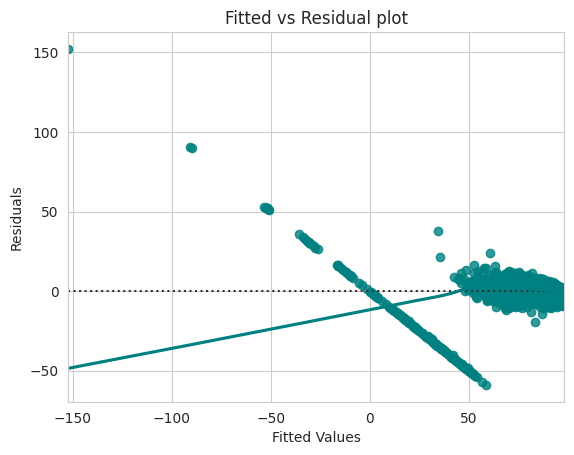

In [ ]:

# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="teal", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No pattern in the data thus the assumption of linearity and independence of predictors satisfied

Test for Normality

In [ ]:
from scipy import stats
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.5472744703292847, pvalue=0.0)

* Since p-value < 0.05, the residuals are not normal as per shapiro test.

Test for Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
x=sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]
#x>.05, Since p-value > 0.05 we can say that the residuals are homoscedastic.
if x>0.05:
  print("The residuals are not heteroscedastic")
else:
  print("The residuals are heteroscedastic")


The residuals are heteroscedastic


he model built olsmod_8 satisfies all assumptions of Linear Regression

In [ ]:
X_test.columns

Index(['const', 'pgfree', 'atch', 'pgin', 'OI_bal', 'Total_Call',
       'memory_utilization', 'page_fault_rate', 'read_write_correlation',
       'system_call_correlation', 'memory_access_pattern', 'runqsz_CPU_Bound'],
      dtype='object')

In [ ]:
# let's make predictions on the test set
y_pred = olsres_8.predict(X_test)

In [ ]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(Y_train, df_pred["Fitted Values"]))
rmse1

7.535659679500802

In [ ]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(Y_test, y_pred))
rmse2

10.62801176707126

In [ ]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(Y_train, df_pred["Fitted Values"])
mae1

3.4276337242138113

In [ ]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(Y_test, y_pred)
mae2

3.8154101807703724

*  We can see that RMSE on the train and test sets are comparable. So, our model is not may suffering from overfitting.


*  MAE indicates that our current model is able to predict use within a mean small error of on the test data.


*  Hence, we can conclude the model "olsres_8" is good for prediction as well as inference purposes.

Linear Regression using (sklearn)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for pgfree is -0.021799068808922923
The coefficient for atch is -0.1259181037657146
The coefficient for pgin is -0.0896162500885317
The coefficient for OI_bal is -0.010261355245245874
The coefficient for Total_Call is -0.0012862557548909365
The coefficient for memory_utilization is -7.651659578734443
The coefficient for page_fault_rate is -0.019011175280274566
The coefficient for read_write_correlation is -6.306657388586218e-16
The coefficient for system_call_correlation is -5.018467678280393e-16
The coefficient for memory_access_pattern is -5.2938719182528404e-06
The coefficient for runqsz_CPU_Bound is -0.9183257553533366


In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 98.58444646193094


In [ ]:
# R square on training data
regression_model.score(X_train, Y_train)

0.8265412437472234

82 percent Variation in the USR is explained by the Model

In [ ]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

7.535659679500802

In [ ]:
#RMSE on Test data
from sklearn import metrics
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

10.628011767071364

In [ ]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(Y_train, predicted_train)
mae1

3.4276337242140316

In [ ]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(Y_test, predicted_test)
mae2

3.815410180770604


##Objective
In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

Data Description
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [ ]:
#Read The Dataset of Problem 2
df2=pd.read_excel(path1)

#### Exploratory Data Analysis
-  Data types, statistical summary - Univariate analysis - Multivariate analysis - visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [ ]:
#show all rows
pd.set_option("display.max_rows", None)
df2.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [ ]:
#datatype
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [ ]:
#null value in the Dataset
df2.isnull().sum()[lambda x:x>0]

Wife_age               71
No_of_children_born    21
dtype: int64

In [ ]:
#shape of the Data
df2.shape

(1473, 10)

In [ ]:
#duplicate values check
df2.duplicated().sum()

80

In [ ]:
#delete the duplicate rows
df2=df2.drop_duplicates()

In [ ]:
#duplicate values check
df2.duplicated().sum()

0

In [ ]:
#shape of the Data
df2.shape

(1393, 10)

In [ ]:
#null value in the Dataset
df2.isnull().sum()[lambda x:x>0]

Wife_age               67
No_of_children_born    21
dtype: int64

In [ ]:
#value count in the df2[wife Age and no of children born]
df2["Wife_age"].value_counts()
#to check if

Wife_age
25.0    74
26.0    60
30.0    57
32.0    57
28.0    57
24.0    56
35.0    54
22.0    54
27.0    54
29.0    53
33.0    51
36.0    45
34.0    44
37.0    44
23.0    42
38.0    42
31.0    40
21.0    40
47.0    39
45.0    36
44.0    36
42.0    35
39.0    33
40.0    33
43.0    32
48.0    30
41.0    28
20.0    25
49.0    22
46.0    19
19.0    17
17.0     8
18.0     6
16.0     3
Name: count, dtype: int64

In [ ]:
df2["No_of_children_born"].value_counts()

No_of_children_born
2.0     258
1.0     257
3.0     232
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: count, dtype: int64

In [ ]:
#describe the numeric Data
df2.describe(include="all").T

count unique          top  freq      mean  \
Wife_age                   1393.0    NaN          NaN   NaN  32.53051   
Wife_ education              1393      4     Tertiary   515       NaN   
Husband_education            1393      4     Tertiary   827       NaN   
No_of_children_born        1393.0    NaN          NaN   NaN  3.286432   
Wife_religion                1393      2  Scientology  1186       NaN   
Wife_Working                 1393      2           No  1043       NaN   
Husband_Occupation         1393.0    NaN          NaN   NaN  2.174444   
Standard_of_living_index     1393      4    Very High   618       NaN   
Media_exposure               1393      2      Exposed  1284       NaN   
Contraceptive_method_used    1393      2          Yes   779       NaN   

                                std   min   25%   50%   75%   max  
Wife_age                   8.088188  16.0  26.0  32.0  38.0  49.0  
Wife_ education                 NaN   NaN   NaN   NaN   NaN   NaN  
Husband_education               NaN   NaN   NaN   NaN   NaN   NaN  
No_of_children_born        2.381791   0.0   1.0   3.0   5.0  16.0  
Wife_religion                   NaN   NaN   NaN   NaN   NaN   NaN  
Wife_Working                    NaN   NaN   NaN   NaN   NaN   NaN  
Husband_Occupation          0.85459   1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index        NaN   NaN   NaN   NaN   NaN   NaN  
Media_exposure                  NaN   NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used       NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
#Assign numeric values to the subset dataset
df2_num=df2[["Wife_age", "No_of_children_born"]]


In [ ]:
df2_num.head()

Wife_age  No_of_children_born
0      24.0                  3.0
1      45.0                 10.0
2      43.0                  7.0
3      42.0                  9.0
4      36.0                  8.0

In [ ]:
#shape of the df2_num
df2_num.shape

(1393, 2)

In [ ]:
#null value in df2_num
df2_num.isnull().sum()[lambda x:x>0]

Wife_age               67
No_of_children_born    21
dtype: int64

In [ ]:
#from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imr=imputer.fit(df2_num)
df2_num=pd.DataFrame(imr.transform(df2_num), columns=df2_num.columns)

In [ ]:
#Check the missing values
df2_num.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
#Impute the Null value with the Median
df2['Wife_age'] = df2['Wife_age'].fillna(df2['Wife_age'].median())

In [ ]:
#
df2["No_of_children_born"]=df2["No_of_children_born"].fillna(df2["No_of_children_born"].median())

In [ ]:
#check the null values
df2.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
df2.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

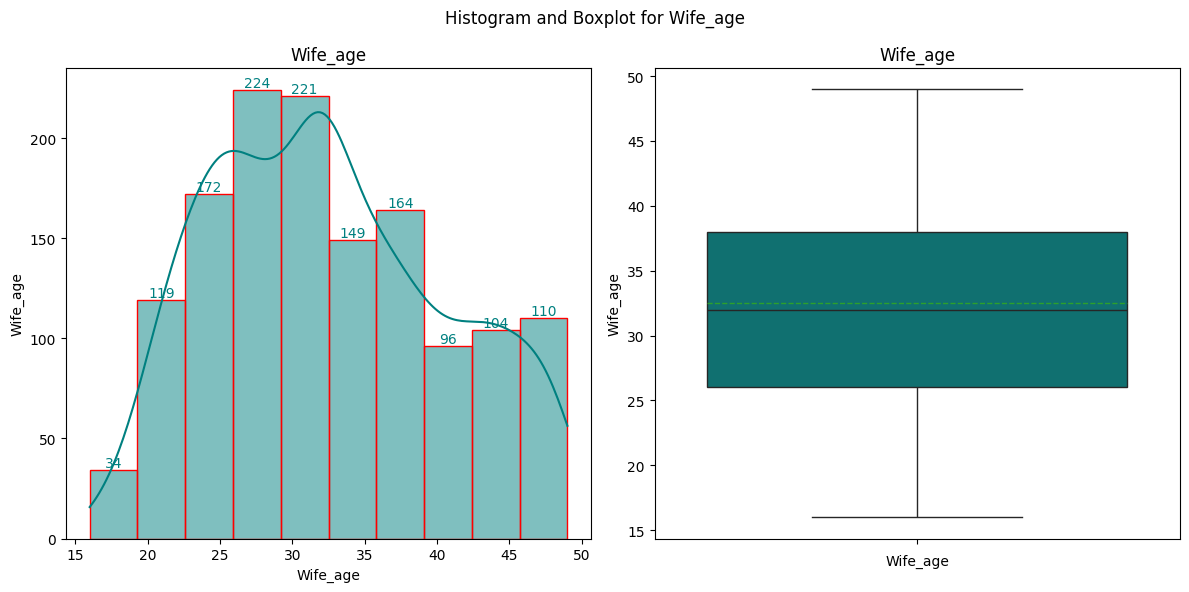

Skewness: 0.27590764346223623
Statistical Summary count    1393.000000
mean       32.530510
std         8.088188
min        16.000000
25%        26.000000
50%        32.000000
75%        38.000000
max        49.000000
Name: Wife_age, dtype: float64
________________________


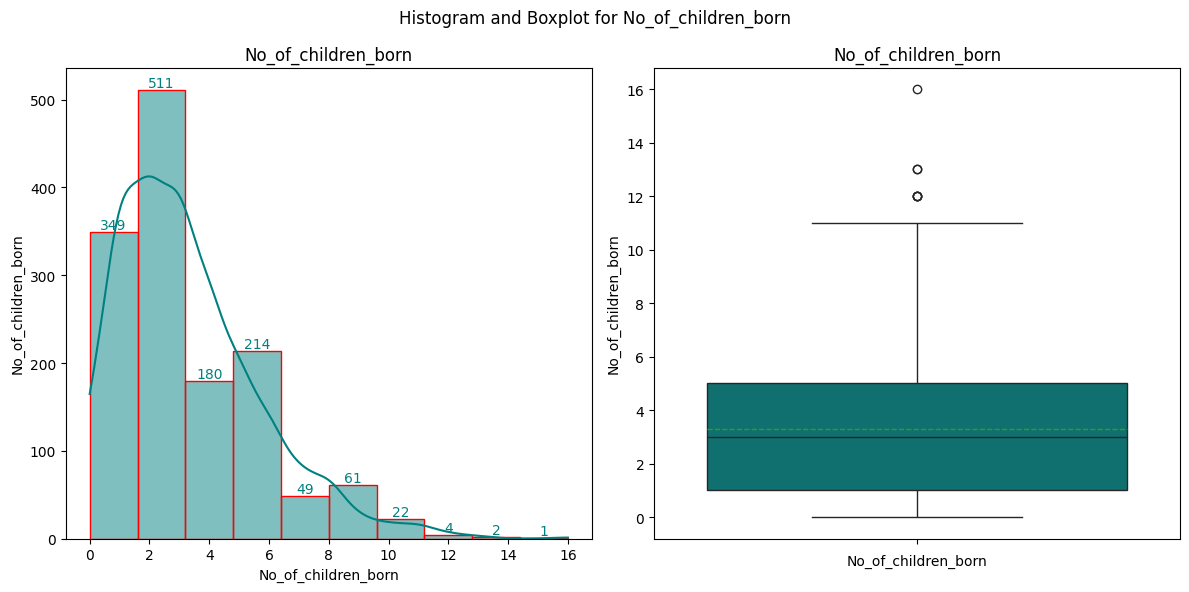

Skewness: 1.101235327654049
Statistical Summary count    1393.000000
mean        3.286432
std         2.381791
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        16.000000
Name: No_of_children_born, dtype: float64
________________________


In [ ]:
#For loop for the distibution of the Numerical Values
for column in df2_num.columns:
  histogram_boxplot(df2_num, column)
  print("Skewness:", df2_num[column].skew())
  print("Statistical Summary", df2_num[column].describe())
  print("________________________")

In [ ]:
#change datatype of Husband_Occupation to object
df2["Husband_Occupation"]=df2["Husband_Occupation"].astype(object)

In [ ]:
#categorical value subdataset
df2_cat=df2.select_dtypes("object")

In [ ]:
#Check the Unique value in each categorical Variable
for i in df2_cat.columns:
   print(df2_cat[i].value_counts().sort_values(ascending=False))
   print(df2_cat[i].unique())
   print("_____________________________")

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64
['Primary' 'Uneducated' 'Secondary' 'Tertiary']
_____________________________
Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64
['Secondary' 'Primary' 'Tertiary' 'Uneducated']
_____________________________
Wife_religion
Scientology        1186
Non-Scientology     207
Name: count, dtype: int64
['Scientology' 'Non-Scientology']
_____________________________
Wife_Working
No     1043
Yes     350
Name: count, dtype: int64
['No' 'Yes']
_____________________________
Husband_Occupation
3    570
2    415
1    381
4     27
Name: count, dtype: int64
[2 3 1 4]
_____________________________
Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: count, dtype: int64
['High' 'Very High' 'Low' 'Very Low']
_____________________________
Media_exposure 
Exposed        1284
Not-Exposed 

In [ ]:
#Function to Plot the Barplot for the Categorical Values
def bar_plot(data, variable):

  a1 = sns.countplot(x=data[variable], order=data[variable].value_counts().index, color='teal')
  a1.bar_label(a1.containers[0], color='teal')
  a1.set_xlabel(variable)
  plt.xticks(rotation=45)
  a1.set_ylabel(variable)
  a1.set_title(variable)
  plt.show()

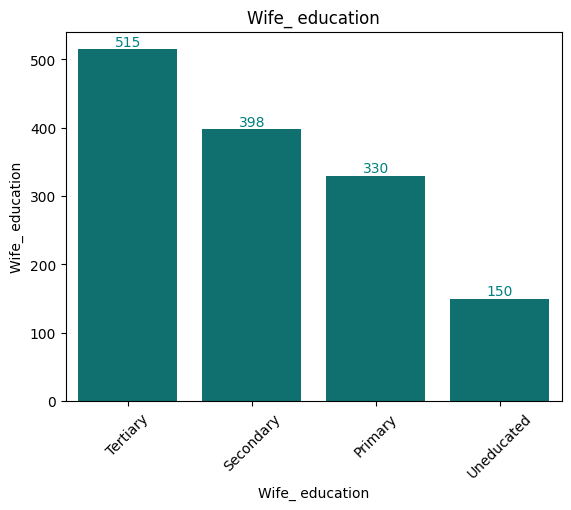

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64
['Primary' 'Uneducated' 'Secondary' 'Tertiary']
_____________________________


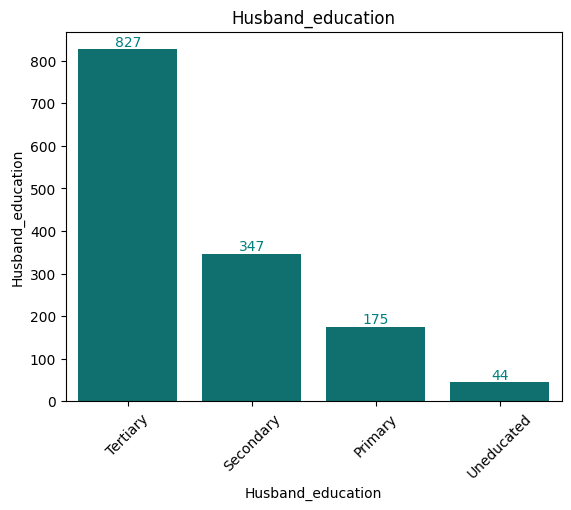

Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64
['Secondary' 'Primary' 'Tertiary' 'Uneducated']
_____________________________


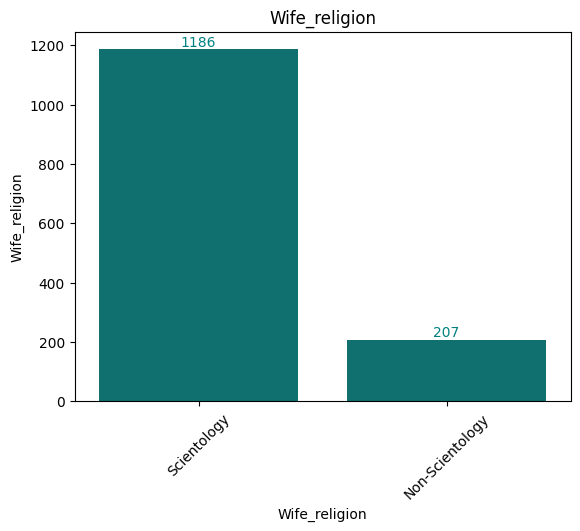

Wife_religion
Scientology        1186
Non-Scientology     207
Name: count, dtype: int64
['Scientology' 'Non-Scientology']
_____________________________


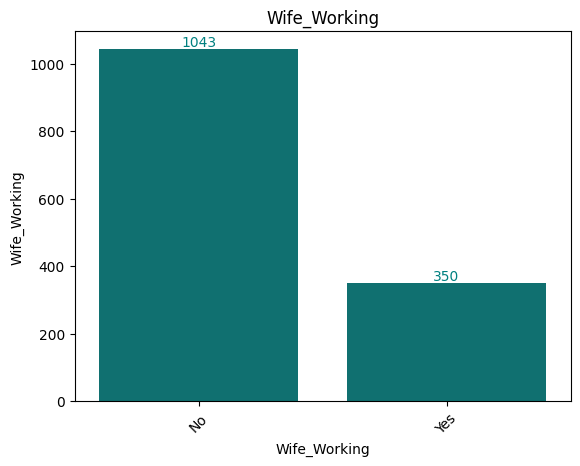

Wife_Working
No     1043
Yes     350
Name: count, dtype: int64
['No' 'Yes']
_____________________________


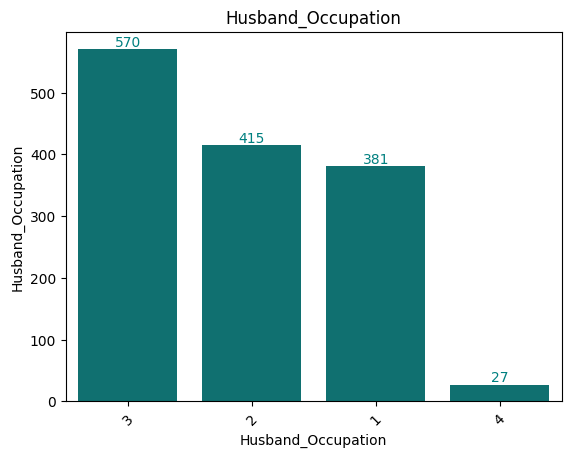

Husband_Occupation
3    570
2    415
1    381
4     27
Name: count, dtype: int64
[2 3 1 4]
_____________________________


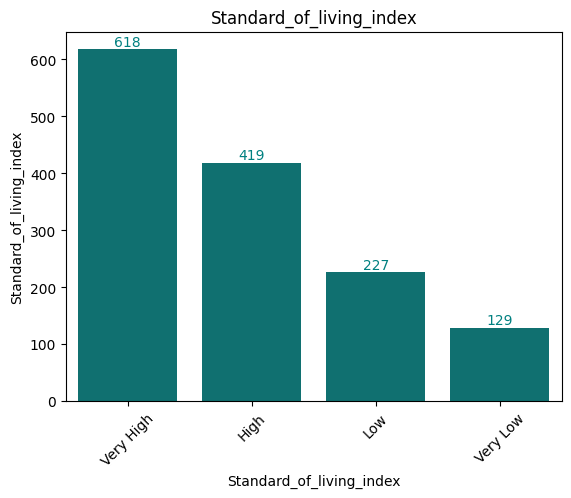

Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: count, dtype: int64
['High' 'Very High' 'Low' 'Very Low']
_____________________________


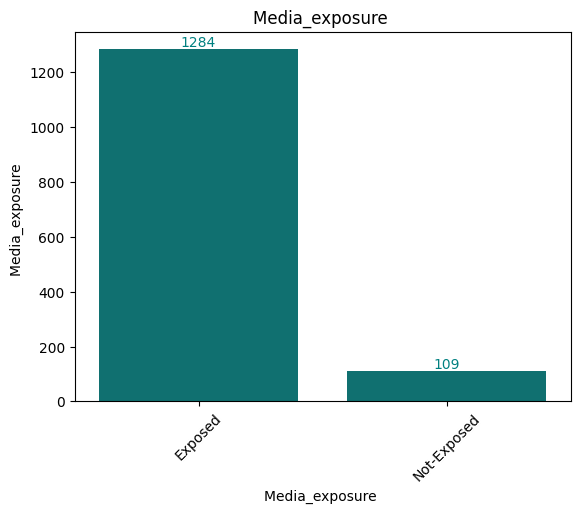

Media_exposure 
Exposed        1284
Not-Exposed     109
Name: count, dtype: int64
['Exposed' 'Not-Exposed']
_____________________________


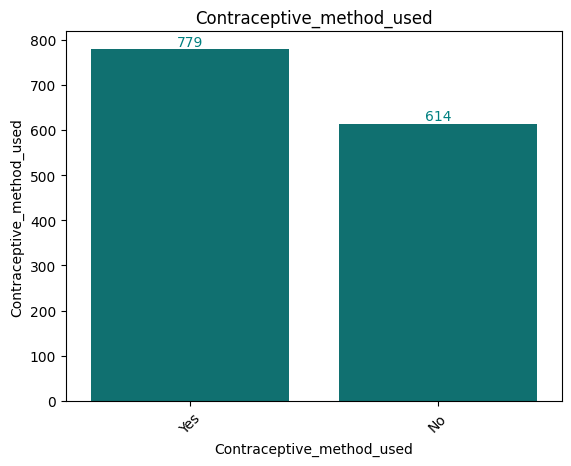

Contraceptive_method_used
Yes    779
No     614
Name: count, dtype: int64
['No' 'Yes']
_____________________________


In [ ]:
#To show the Count Plot of all the Categorical Values
for column in df2_cat:
   bar_plot(df2_cat, column)
   print(df2_cat[column].value_counts().sort_values(ascending=False))
   print(df2_cat[column].unique())
   print("_____________________________")

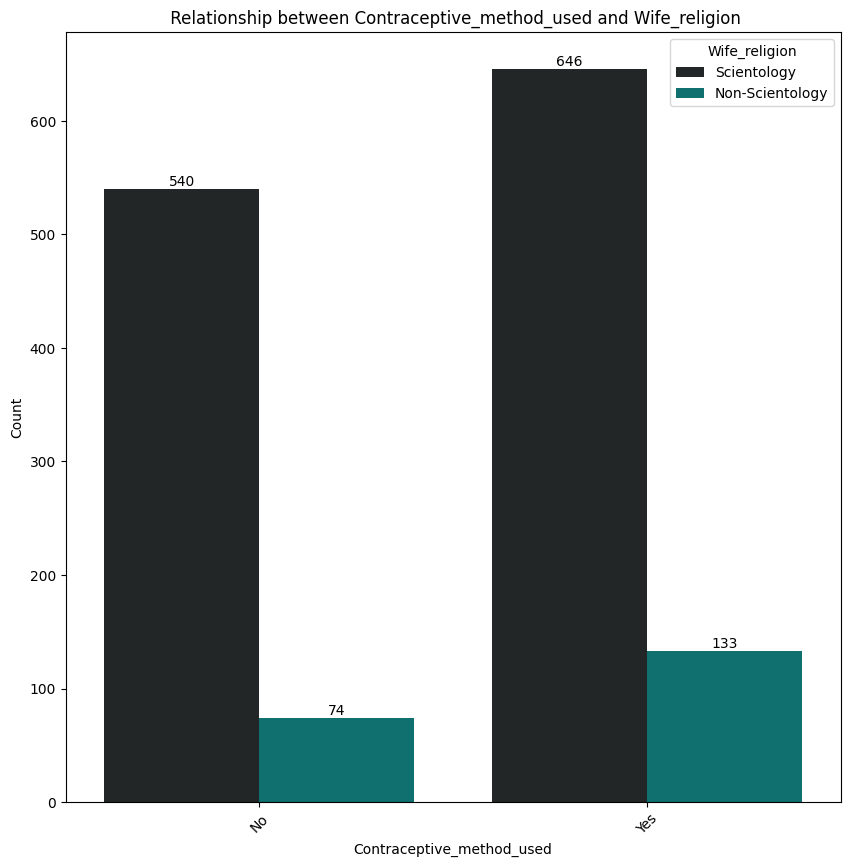

In [ ]:

plt.figure(figsize=(10, 10))
a1=sns.countplot(x='Contraceptive_method_used',data=df2,hue="Wife_religion", color="teal")
#addvalue count on the both bar
a1.bar_label(a1.containers[0])
a1.bar_label(a1.containers[1])
a1.set_xlabel("Contraceptive_method_used")
a1.set_ylabel("Count")
a1.set_title(" Relationship between Contraceptive_method_used and Wife_religion")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#groupby between Wife_religion and Contraceptive_method_used
df2.groupby(["Wife_religion","Contraceptive_method_used"]).size()


Wife_religion    Contraceptive_method_used
Non-Scientology  No                            74
                 Yes                          133
Scientology      No                           540
                 Yes                          646
dtype: int64

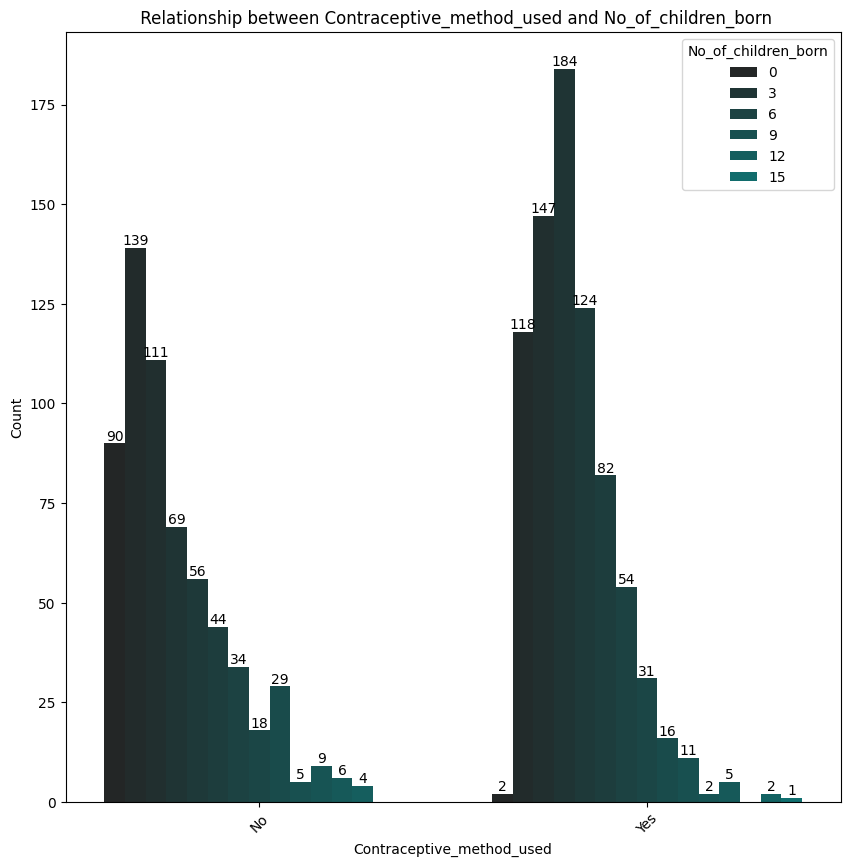

In [ ]:

plt.figure(figsize=(10, 10))
a1=sns.countplot(x='Contraceptive_method_used',data=df2,hue="No_of_children_born", color="teal")
#addvalue count on the both bar
a1.bar_label(a1.containers[0])
a1.bar_label(a1.containers[1])
a1.bar_label(a1.containers[2])
a1.bar_label(a1.containers[3])
a1.bar_label(a1.containers[4])
a1.bar_label(a1.containers[5])
a1.bar_label(a1.containers[6])
a1.bar_label(a1.containers[7])
a1.bar_label(a1.containers[8])
a1.bar_label(a1.containers[9])
a1.bar_label(a1.containers[10])
a1.bar_label(a1.containers[11])
a1.bar_label(a1.containers[12])
a1.bar_label(a1.containers[13])
a1.bar_label(a1.containers[14])
a1.set_xlabel("Contraceptive_method_used")
a1.set_ylabel("Count")
a1.set_title(" Relationship between Contraceptive_method_used and No_of_children_born")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#groupby between No of children and Contraceptive_method_used
#max rows
pd.set_option("display.max_rows", None)
df2.groupby(["No_of_children_born","Contraceptive_method_used"]).size()


No_of_children_born  Contraceptive_method_used
0.0                  No                            90
                     Yes                            2
1.0                  No                           139
                     Yes                          118
2.0                  No                           111
                     Yes                          147
3.0                  No                            69
                     Yes                          184
4.0                  No                            56
                     Yes                          124
5.0                  No                            44
                     Yes                           82
6.0                  No                            34
                     Yes                           54
7.0                  No                            18
                     Yes                           31
8.0                  No                            29
                     Yes           

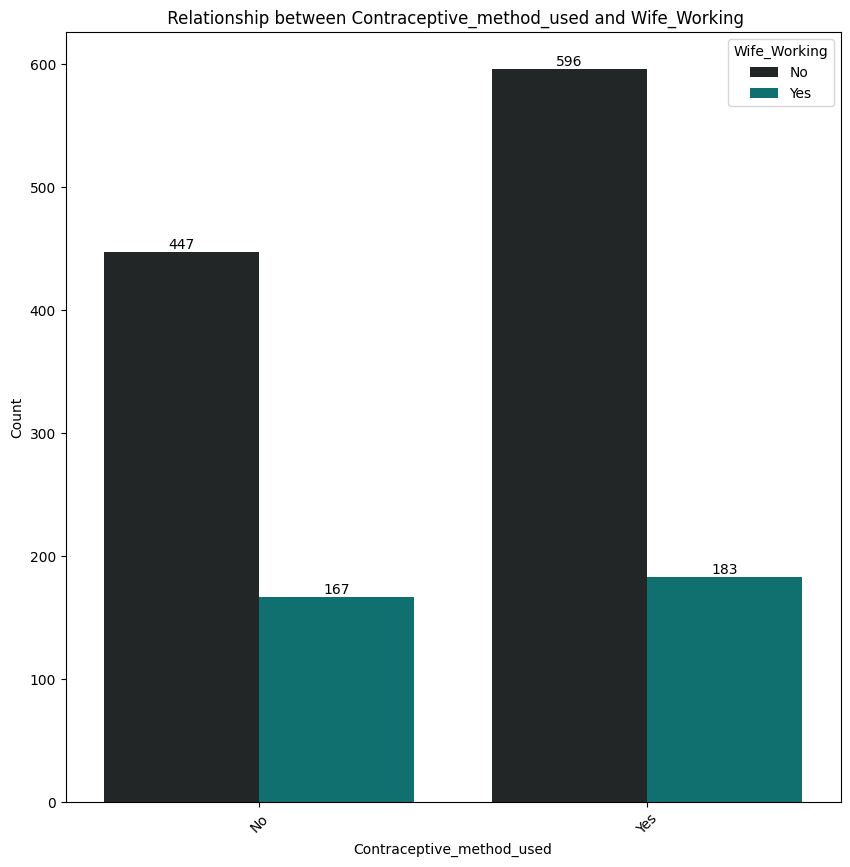

In [ ]:

plt.figure(figsize=(10, 10))
a1=sns.countplot(x='Contraceptive_method_used',data=df2,hue="Wife_Working", color="teal")
#addvalue count on the both bar
a1.bar_label(a1.containers[0])
a1.bar_label(a1.containers[1])

a1.set_xlabel("Contraceptive_method_used")
a1.set_ylabel("Count")
a1.set_title(" Relationship between Contraceptive_method_used and Wife_Working")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df2.groupby(["Wife_Working","Contraceptive_method_used"]).size()


Wife_Working  Contraceptive_method_used
No            No                           447
              Yes                          596
Yes           No                           167
              Yes                          183
dtype: int64

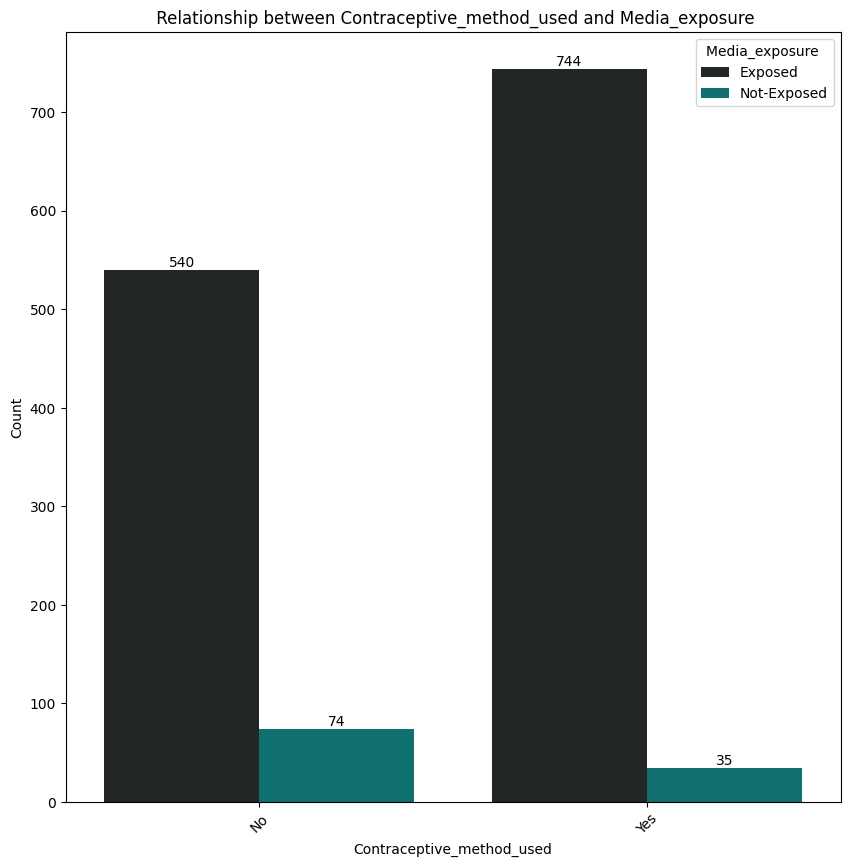

In [ ]:

plt.figure(figsize=(10, 10))
a1=sns.countplot(x='Contraceptive_method_used',data=df2,hue="Media_exposure ", color="teal")
#addvalue count on the both bar
a1.bar_label(a1.containers[0])
a1.bar_label(a1.containers[1])

a1.set_xlabel("Contraceptive_method_used")
a1.set_ylabel("Count")
a1.set_title(" Relationship between Contraceptive_method_used and Media_exposure")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df2.groupby(["Media_exposure ","Contraceptive_method_used"]).size()


Media_exposure   Contraceptive_method_used
Exposed          No                           540
                 Yes                          744
Not-Exposed      No                            74
                 Yes                           35
dtype: int64

Multivarient analysis

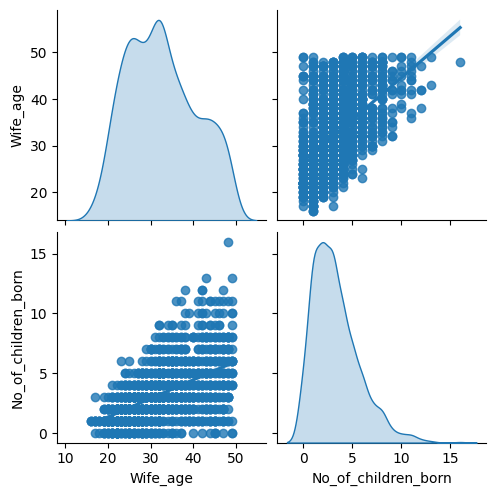

In [ ]:
sns.pairplot(df2_num, kind="reg", diag_kind="kde")

plt.show()


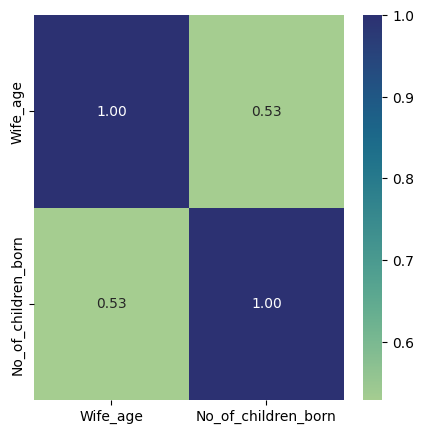

In [ ]:
fig = plt.subplots(figsize=(5, 5))
sns.heatmap(df2_num.corr(), annot=True,fmt='.2f', cmap="crest")
plt.show()

In [ ]:
df2_num.corr()

Wife_age  No_of_children_born
Wife_age             1.000000             0.528428
No_of_children_born  0.528428             1.000000

 The value 0.528428 indicates a moderate positive correlation between Wife_age and No_of_children_born. This means that as Wife_age increases, No_of_children_born also tends to increase.

Problem 2 - Data Pre-processing
Prepare the data for modelling: - Missing value Treatment (if needed) - Outlier Detection(treat, if needed) - Feature Engineering (if needed) - Encode the data - Train-test split

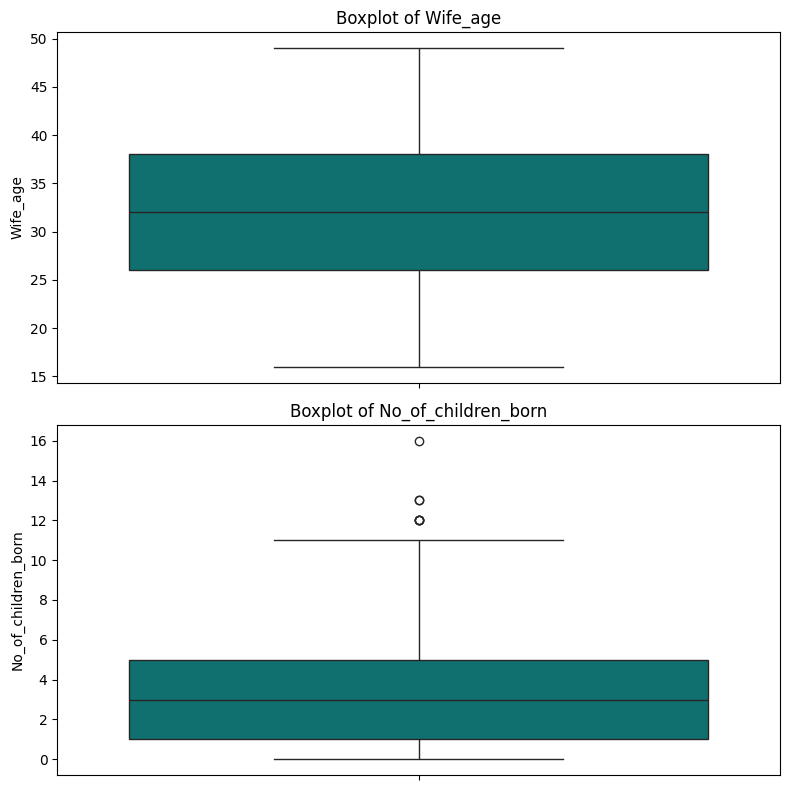

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (8,8))
feature_list = df2_num.columns #insert
for i in range(len(feature_list)):
    plt.subplot(2, 1, i + 1)
    sns.boxplot(y = df2_num[feature_list[i]], data = df2_num, color="teal") #insert
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

There are some outlier in the Feature "No of Children Born", need to be treated as the No. of Children shows here 16 seems to be an error in data

In [ ]:
#For Loop to found the Number of Outler in each column with the percantage of the Outlier in a particular column
for column in df2_num:
    print(column)
    print(count_outliers(df2_num, column))
    print("Percentage of Outlier with the  Original Datset", round((count_outliers(df2_num, column)/len(df2_num))*100,2))
    print(df2_num[column].skew())
    print("__________________________")

Wife_age
0
Percentage of Outlier with the  Original Datset 0.0
0.27590764346223623
__________________________
No_of_children_born
7
Percentage of Outlier with the  Original Datset 0.5
1.101235327654049
__________________________


In [ ]:
#Cap & floor the values beyond the outlier boundaries
feature_list = df2_num.columns
for i in df2_num.columns:
    LL, UL = remove_outlier(df2_num[i])
    df2_num[i] = np.where(df2_num[i] > UL, UL, df2_num[i])
    df2_num[i] = np.where(df2_num[i] < LL, LL, df2_num[i])

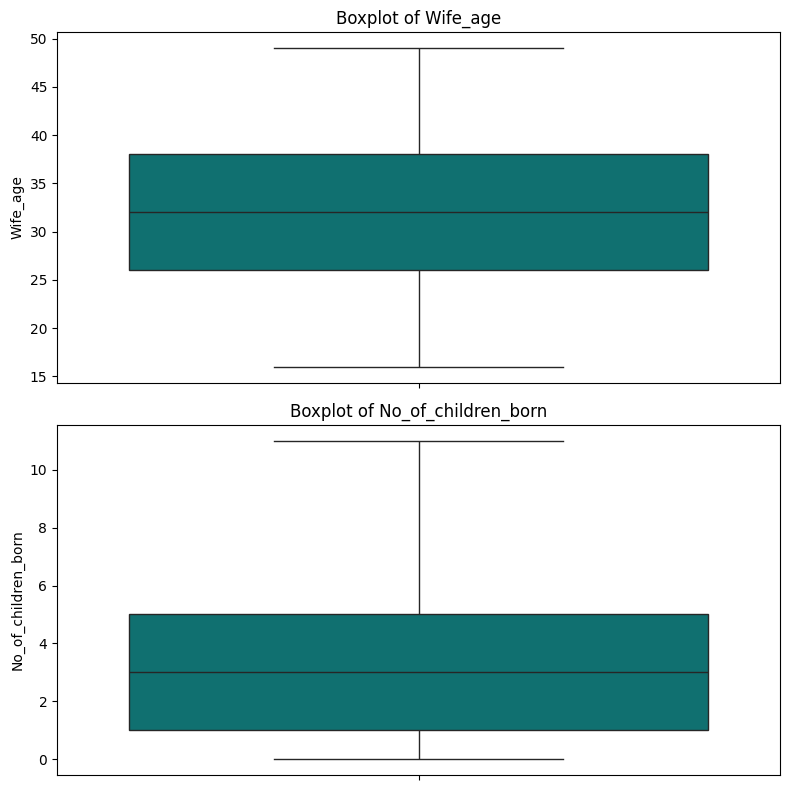

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (8,8))
feature_list = df2_num.columns #insert
for i in range(len(feature_list)):
    plt.subplot(2, 1, i + 1)
    sns.boxplot(y = df2_num[feature_list[i]], data = df2_num, color="teal") #insert
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

###Model Building and Compare the Performance of the Models
- Build a Logistic Regression model - Build a Linear Discriminant Analysis model - Build a CART model - Prune the CART model by finding the best hyperparameters using GridSearch - Check the performance of the models across train and test set using different metrics - Compare the performance of all the models built and choose the best one with proper rationale

In [ ]:
df2.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [ ]:
#null values
df2.isnull().sum()[lambda x:x>0]

Wife_age               67
No_of_children_born    21
dtype: int64

In [ ]:
#info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [ ]:
#trim the Space inside the columns name
df2.columns = df2.columns.str.strip()

In [ ]:
#rename the Wife_education
df2.rename(columns= {"Wife_ education":"Wife_education"}, inplace=True)

In [ ]:
#info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_education             1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [ ]:
df2.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [ ]:
#create dummy varible
df3=pd.get_dummies(df2, columns=['Wife_education','Husband_education','Wife_religion','Wife_Working','Standard_of_living_index','Media_exposure', "Contraceptive_method_used"],drop_first=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Wife_age                            1393 non-null   float64
 1   No_of_children_born                 1393 non-null   float64
 2   Husband_Occupation                  1393 non-null   int64  
 3   Wife_education_Secondary            1393 non-null   bool   
 4   Wife_education_Tertiary             1393 non-null   bool   
 5   Wife_education_Uneducated           1393 non-null   bool   
 6   Husband_education_Secondary         1393 non-null   bool   
 7   Husband_education_Tertiary          1393 non-null   bool   
 8   Husband_education_Uneducated        1393 non-null   bool   
 9   Wife_religion_Scientology           1393 non-null   bool   
 10  Wife_Working_Yes                    1393 non-null   bool   
 11  Standard_of_living_index_Low        1393 non-nul

In [ ]:
#
df3.head().T

0      1      2      3      4
Wife_age                             24.0   45.0   43.0   42.0   36.0
No_of_children_born                   3.0   10.0    7.0    9.0    8.0
Husband_Occupation                      2      3      3      3      3
Wife_education_Secondary            False  False  False   True   True
Wife_education_Tertiary             False  False  False  False  False
Wife_education_Uneducated           False   True  False  False  False
Husband_education_Secondary          True   True   True  False   True
Husband_education_Tertiary          False  False  False  False  False
Husband_education_Uneducated        False  False  False  False  False
Wife_religion_Scientology            True   True   True   True   True
Wife_Working_Yes                    False  False  False  False  False
Standard_of_living_index_Low        False  False  False  False   True
Standard_of_living_index_Very High  False   True   True  False  False
Standard_of_living_index_Very Low   False  False  False  False  False
Media_exposure_Not-Exposed          False  False  False  False  False
Contraceptive_method_used_Yes       False  False  False  False  False

In [ ]:
df3.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_Secondary', 'Wife_education_Tertiary',
       'Wife_education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure _Not-Exposed',
       'Contraceptive_method_used_Yes'],
      dtype='object')

In [ ]:
#Change the Datatype to integer from bolean
df3["Wife_education_Secondary"]=df3["Wife_education_Secondary"].astype(int)
df3["Wife_education_Tertiary"]=df3["Wife_education_Tertiary"].astype(int)
df3["Wife_education_Uneducated"]=df3["Wife_education_Uneducated"].astype(int)

df3["Husband_education_Secondary"]=df3["Husband_education_Secondary"].astype(int)
df3["Husband_education_Tertiary"]=df3["Husband_education_Tertiary"].astype(int)
df3["Husband_education_Uneducated"]=df3["Husband_education_Uneducated"].astype(int)

df3["Wife_religion_Scientology"]=df3["Wife_religion_Scientology"].astype(int)

df3["Wife_Working_Yes"]=df3["Wife_Working_Yes"].astype(int)

df3["Standard_of_living_index_Low"]=df3["Standard_of_living_index_Low"].astype(int)
df3["Standard_of_living_index_Very Low"]=df3["Standard_of_living_index_Very Low"].astype(int)
df3["Standard_of_living_index_Very High"]=df3["Standard_of_living_index_Very High"].astype(int)

df3["Media_exposure_Not-Exposed"]=df3["Media_exposure_Not-Exposed"].astype(int)

df3["Contraceptive_method_used_Yes"]=df3["Contraceptive_method_used_Yes"].astype(int)




In [ ]:
#
df3.head()

Wife_age  No_of_children_born  Husband_Occupation  \
0      24.0                  3.0                   2   
1      45.0                 10.0                   3   
2      43.0                  7.0                   3   
3      42.0                  9.0                   3   
4      36.0                  8.0                   3   

   Wife_education_Secondary  Wife_education_Tertiary  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         1                        0   
4                         1                        0   

   Wife_education_Uneducated  Husband_education_Secondary  \
0                          0                            1   
1                          1                            1   
2                          0                            1   
3                          0                            0   
4                          0                            1   

   Husband_education_Tertiary  Husband_education_Uneducated  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Wife_religion_Scientology  Wife_Working_Yes  Standard_of_living_index_Low  \
0                          1                 0                             0   
1                          1                 0                             0   
2                          1                 0                             0   
3                          1                 0                             0   
4                          1                 0                             1   

   Standard_of_living_index_Very High  Standard_of_living_index_Very Low  \
0                                   0                                  0   
1                                   1                                  0   
2                                   1                                  0   
3                                   0                                  0   
4                                   0                                  0   

   Media_exposure_Not-Exposed  Contraceptive_method_used_Yes  
0                           0                              0  
1                           0                              0  
2                           0                              0  
3                           0                              0  
4                           0                              0

In [ ]:
#Shape of the Dataset
df3_c.shape

(1393, 16)

In [ ]:
df3_c["No_of_children_born"]=df2_num["No_of_children_born"]

In [ ]:
#null value
df3_c.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
df3_c["No_of_children_born"].value_counts()

No_of_children_born
1.0     248
2.0     243
3.0     238
4.0     160
5.0     119
0.0      88
6.0      85
7.0      48
8.0      43
11.0     18
9.0      15
10.0     11
Name: count, dtype: int64

In [ ]:
df3_c["Contraceptive_method_used_Yes"].value_counts()

Contraceptive_method_used_Yes
1    779
0    614
Name: count, dtype: int64

In [ ]:
df3_c.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
#fill null variable with median
df3_c["No_of_children_born"]=df3_c["No_of_children_born"].fillna(df3_c["No_of_children_born"].median())

In [ ]:
df3_c.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

Train and Test Split

In [ ]:
#independent Variable
x=df3_c.drop(["Contraceptive_method_used_Yes"], axis=1)

In [ ]:
#dependent variable
y=df3_c[["Contraceptive_method_used_Yes"]]

In [ ]:
#split the data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=1, stratify=y)

In [ ]:
df3_c.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_Secondary', 'Wife_education_Tertiary',
       'Wife_education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure_Not-Exposed',
       'Contraceptive_method_used_Yes'],
      dtype='object')

Model -1
0.6841025641025641
[[238 192]
 [116 429]]
              precision    recall  f1-score   support

           0       0.67      0.55      0.61       430
           1       0.69      0.79      0.74       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.68       975

__________________________________________


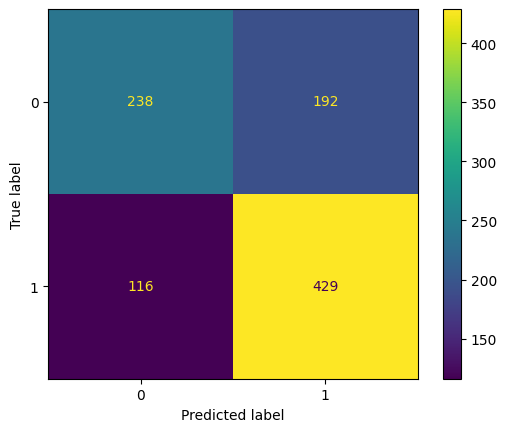

In [ ]:
# Fit the model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
#Model 1 - default model
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_train)
model_score = model.score(x_train, y_train)

print("Model -1")
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
cm_1=confusion_matrix(y_train, y_predict)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=model.classes_)
disp_1.plot()

print(metrics.classification_report(y_train, y_predict))
print("__________________________________________")
#print(metrics.confusion_matrix(y_test, y_predict))
#print(metrics.classification_report(y_test, y_predict))

Model -2
0.681025641025641
[[238 192]
 [116 429]]
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       430
           1       0.69      0.79      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.68       975

__________________________________________


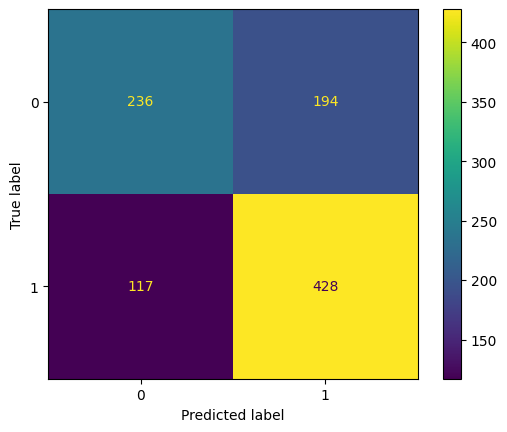

In [ ]:
# Model -2
#model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
print("Model -2")
model = LogisticRegression(solver='newton-cg')
model.fit(x_train, y_train)
model_score = model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
ytrain_predict = model.predict(x_train)
cm_2=confusion_matrix(y_train, ytrain_predict)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp_2.plot()
print(metrics.classification_report(y_train, ytrain_predict))
print("__________________________________________")


In [ ]:
ytrain_predict = model.predict(x_train)
cm=confusion_matrix(y_train, ytrain_predict)

In [ ]:
cm=confusion_matrix(y_train, ytrain_predict)

In [ ]:
print(metrics.classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52       430
           1       0.64      0.77      0.70       545

    accuracy                           0.63       975
   macro avg       0.63      0.61      0.61       975
weighted avg       0.63      0.63      0.62       975



In [ ]:
# Accuracy - Training Data
model.score(x_train, y_train)

0.6317948717948718

Confusion Matrix for the Test data

In [ ]:
ytest_predict = model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test, ytest_predict)

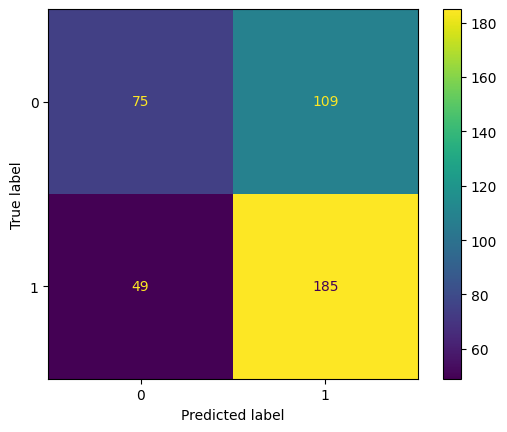

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49       184
           1       0.63      0.79      0.70       234

    accuracy                           0.62       418
   macro avg       0.62      0.60      0.59       418
weighted avg       0.62      0.62      0.61       418



Model -3
Model-Score 0.6758974358974359
Confusion Matrix
[[238 192]
 [116 429]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       430
           1       0.69      0.78      0.73       545

    accuracy                           0.68       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.68      0.67       975

__________________________________________


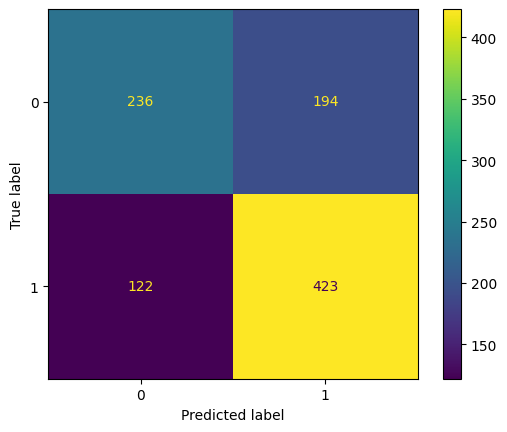

In [ ]:
# Model -3
print("Model -3")
model = LogisticRegression(solver='sag')
model.fit(x_train, y_train)
model_score = model.score(x_train, y_train)
print("Model-Score", model_score)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train, y_predict))
ytrain_predict = model.predict(x_train)
cm_2=confusion_matrix(y_train, ytrain_predict)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp_2.plot()
print("Classification Report")
print(metrics.classification_report(y_train, ytrain_predict))
print("__________________________________________")


Model -4
Model-Score 0.6728205128205128
Confusion Matrix
[[238 192]
 [116 429]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       430
           1       0.68      0.78      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975

__________________________________________


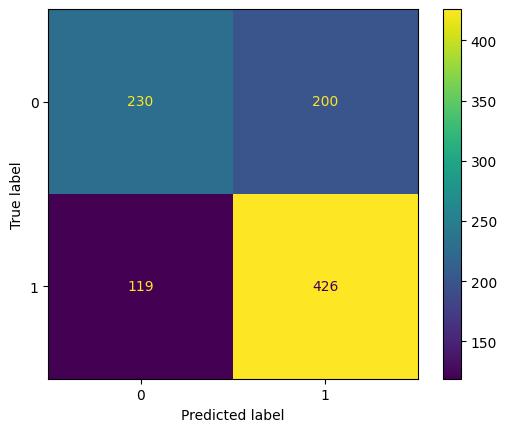

In [ ]:
# Model -4
print("Model-4")
model = LogisticRegression(solver='saga')
model.fit(x_train, y_train)
model_score = model.score(x_train, y_train)
print("Model-Score", model_score)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train, y_predict))
ytrain_predict = model.predict(x_train)
cm_2=confusion_matrix(y_train, ytrain_predict)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp_2.plot()
print("Classification Report")
print(metrics.classification_report(y_train, ytrain_predict))
print("__________________________________________")


Model-5
Model-Score 0.6738461538461539
Confusion Matrix
[[238 192]
 [116 429]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       430
           1       0.68      0.77      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975

__________________________________________


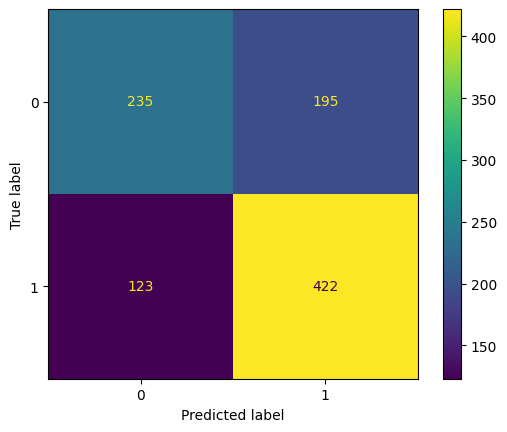

In [ ]:
# Model -5
print("Model-5")
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(x_train, y_train)
model_score = model.score(x_train, y_train)
print("Model-Score", model_score)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train, y_predict))
ytrain_predict = model.predict(x_train)
cm_2=confusion_matrix(y_train, ytrain_predict)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp_2.plot()
print("Classification Report")
print(metrics.classification_report(y_train, ytrain_predict))
print("__________________________________________")


Applying GridSearchCV for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'solver': ['lbfgs','sag','newton-cg','saga'],
             'penalty': ['l2','l1',None,'elasticnet'],
             'tol': [0.0001,0.001,0.1],
             'fit_intercept': [True,False]}

#96 combinations

In [ ]:
grid_search_logit = GridSearchCV(estimator=LogisticRegression(),
                                 param_grid=param_grid,
                                 scoring = 'f1')  #building the object

In [ ]:
import warnings
warnings.filterwarnings('ignore')

grid_search_logit.fit(x_train, y_train);

In [ ]:
#look what are the best parameters, #build the Model
best_grid=grid_search_logit.best_params_
best_grid

{'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}

In [ ]:
best_grid_model = grid_search_logit.best_estimator_

In [ ]:
ytrain_predict = best_grid_model.predict(x_train)

Model-6
Confusion Matrix
[[209 221]
 [104 441]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.49      0.56       430
           1       0.67      0.81      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.65      0.65       975
weighted avg       0.67      0.67      0.66       975

__________________________________________


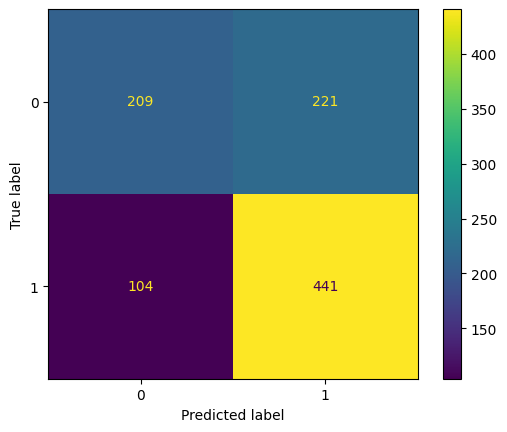

In [ ]:
# Model -6
print("Model-6")
#model = LogisticRegression(solver='liblinear', penalty='l1')
#model.fit(x_train, y_train)
#model_score = model.score(x_train, y_train)
#model_score = best_grid_model.score(x_train, y_train)
ytrain_predict = best_grid_model.predict(x_train)
#print("Model-Score", model_score)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train, ytrain_predict))

cm_2=confusion_matrix(y_train, ytrain_predict)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp_2.plot()
print("Classification Report")
print(metrics.classification_report(y_train, ytrain_predict))
print("__________________________________________")


In [ ]:
#coefficent
best_grid_model.intercept_

array([0.07713526])

In [ ]:
#coefficients = best_grid_model.coef_

In [ ]:
coefficients=best_grid_model.coef_[0]

In [ ]:
odds = np.exp(coefficients) # odds ratio

In [ ]:
feature_importances = pd.DataFrame({"features" : x_train.columns, "coefficient": coefficients, "odds ratio": odds})
print(feature_importances.sort_values(by="odds ratio", ascending=False))


                              features  coefficient  odds ratio
4              Wife_education_Tertiary     0.292298    1.339502
1                  No_of_children_born     0.222568    1.249280
12  Standard_of_living_index_Very High     0.220195    1.246319
7           Husband_education_Tertiary     0.206578    1.229464
2                   Husband_Occupation     0.092581    1.097002
3             Wife_education_Secondary     0.044504    1.045509
6          Husband_education_Secondary    -0.000844    0.999156
10                    Wife_Working_Yes    -0.019852    0.980343
8         Husband_education_Uneducated    -0.028439    0.971962
0                             Wife_age    -0.032355    0.968162
9            Wife_religion_Scientology    -0.033453    0.967101
13   Standard_of_living_index_Very Low    -0.084054    0.919382
11        Standard_of_living_index_Low    -0.095768    0.908675
14          Media_exposure_Not-Exposed    -0.107678    0.897917
5            Wife_education_Uneducated  

In [ ]:
odds

array([[0.96816239, 1.24928022, 1.0970021 , 1.04550924, 1.33950197,
        0.86665381, 0.9991564 , 1.22946407, 0.97196177, 0.9671007 ,
        0.98034333, 0.90867455, 1.24631946, 0.91938168, 0.8979171 ]])

In [ ]:
#variable 1 odds ratio

odds[0][0] / sum(odds[0])

0.06171974513948552

In [ ]:
# Accuracy - Training Data
model.score(x_test, y_test)

0.6220095693779905

Predicting on Training and Test dataset

In [ ]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [ ]:
ytest_predict_prob=model.predict_proba(x_test)
df3_c[["No", "yes"]]=pd.DataFrame(ytest_predict_prob).head()

In [ ]:
df3_c.head()

Wife_age  No_of_children_born  Husband_Occupation  \
0      24.0                  3.0                   2   
1      45.0                 10.0                   3   
2      43.0                  7.0                   3   
3      42.0                  9.0                   3   
4      36.0                  8.0                   3   

   Wife_education_Secondary  Wife_education_Tertiary  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         1                        0   
4                         1                        0   

   Wife_education_Uneducated  Husband_education_Secondary  \
0                          0                            1   
1                          1                            1   
2                          0                            1   
3                          0                            0   
4                          0                            1   

   Husband_education_Tertiary  Husband_education_Uneducated  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Wife_religion_Scientology  Wife_Working_Yes  Standard_of_living_index_Low  \
0                          1                 0                             0   
1                          1                 0                             0   
2                          1                 0                             0   
3                          1                 0                             0   
4                          1                 0                             1   

   Standard_of_living_index_Very High  Standard_of_living_index_Very Low  \
0                                   0                                  0   
1                                   1                                  0   
2                                   1                                  0   
3                                   0                                  0   
4                                   0                                  0   

   Media_exposure_Not-Exposed  Contraceptive_method_used_Yes        No  \
0                           0                              0  0.278972   
1                           0                              0  0.528773   
2                           0                              0  0.332567   
3                           0                              0  0.339301   
4                           0                              0  0.251546   

        yes  
0  0.721028  
1  0.471227  
2  0.667433  
3  0.660699  
4  0.748454

Model Evaluation

In [ ]:
# Accuracy - Training Data
model.score(x_train, y_train)

0.6317948717948718

AUC: 0.710


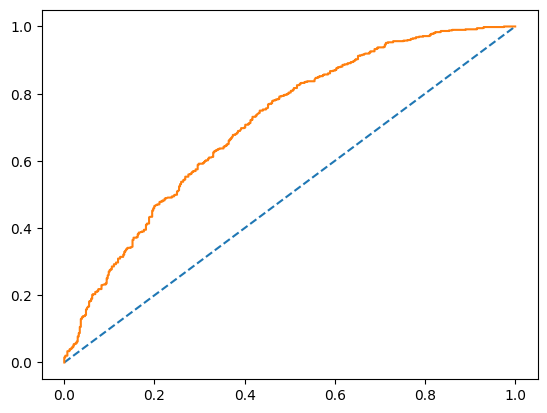

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC and ROC for the training data

In [ ]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.6583710407239819

AUC: 0.710


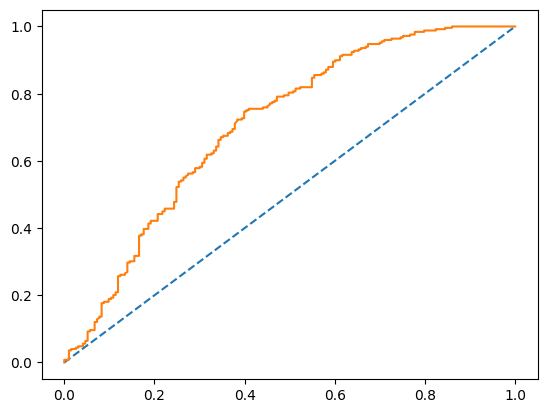

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix for the training data

In [ ]:
cm=confusion_matrix(y_train, ytrain_predict)
cm

array([[211, 225],
       [106, 489]])

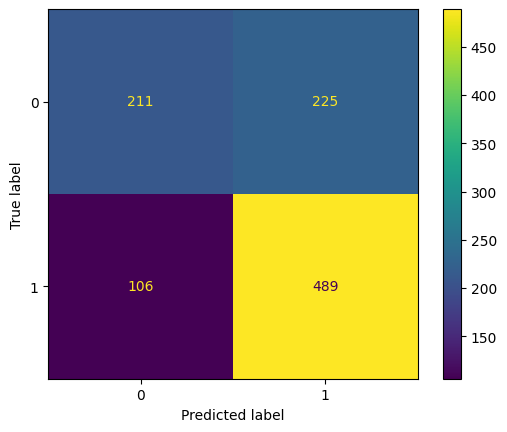

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56       436
           1       0.68      0.82      0.75       595

    accuracy                           0.68      1031
   macro avg       0.68      0.65      0.65      1031
weighted avg       0.68      0.68      0.67      1031



Confusion Matrix for test data

In [ ]:
cm=confusion_matrix(y_test, ytest_predict)
cm

array([[ 87, 106],
       [ 45, 204]])

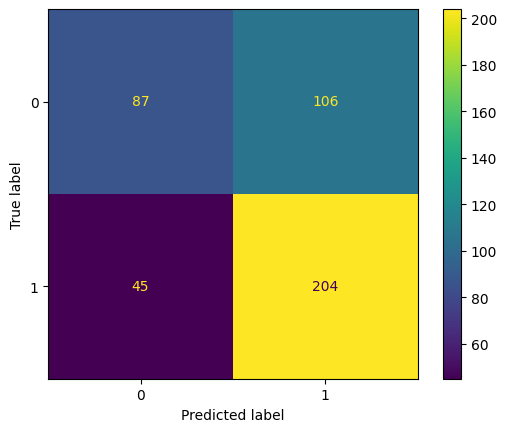

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.45      0.54       193
           1       0.66      0.82      0.73       249

    accuracy                           0.66       442
   macro avg       0.66      0.64      0.63       442
weighted avg       0.66      0.66      0.64       442



Applying GridSearchCV for Logistic Regression

In [ ]:
param_grid = {'solver': ['lbfgs','sag','newton-cg','saga'],
             'penalty': ['l2','l1',None,'elasticnet'],
             'tol': [0.0001,0.001,0.1],
             'fit_intercept': [True,False]}

#96 combinations

In [ ]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring='f1')

In [ ]:
grid_search.fit(x_train, y_train);

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Usi

convergence after 355 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 348 epochs took 1 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 442 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 408 epochs took 1 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 345 epochs took 0 seconds
convergence after 112 epochs took 0 seconds

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.



convergence after 118 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 169 epochs took 0 seconds
convergence after 128 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 129 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_job

convergence after 514 epochs took 0 seconds
convergence after 527 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 712 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 598 epochs took 0 seconds
convergence after 564 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 156 epochs took 0 seconds
convergence after 173 epochs took 0 seconds
convergence after 183 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 182 epochs took 0 seconds
convergence after 179 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 589 epochs took 0 seconds
convergence after 439 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 433 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 519 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 604 epochs took 1 seconds
convergence after 158 epochs took 0 seconds
convergence after 161 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 204 epochs took 0 seconds
convergence after 182 epochs took 0 seconds
convergence after 175 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Para

convergence after 394 epochs took 0 seconds
convergence after 430 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 553 epochs took 0 seconds
convergence after 461 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 416 epochs took 0 seconds
convergence after 118 epochs took 0 seconds
convergence after 129 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 196 epochs took 0 seconds
convergence after 139 epochs took 0 seconds
convergence after 147 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_job

convergence after 561 epochs took 1 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 650 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 893 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 675 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 681 epochs took 1 seconds
convergence after 166 epochs took 0 seconds
convergence after 183 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 197 epochs took 0 seconds
convergence after 196 epochs took 0 seconds
convergence after 189 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend Thre

convergence after 246 epochs took 0 seconds
convergence after 334 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 450 epochs took 0 seconds
convergence after 283 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 382 epochs took 0 seconds
convergence after 111 epochs took 0 seconds
convergence after 121 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 167 epochs took 1 seconds
convergence after 128 epochs took 0 seconds
convergence after 134 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Para

convergence after 397 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 523 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 734 epochs took 1 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 464 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 614 epochs took 0 seconds
convergence after 155 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 172 epochs took 0 seconds
convergence after 182 epochs took 1 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 185 epochs took 0 seconds
convergence after 173 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 438 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 439 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 375 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 450 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 458 epochs took 1 seconds
convergence after 163 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 159 epochs took 0 seconds
convergence after 204 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 188 epochs took 0 seconds
convergence after 169 epochs took 0 seconds
convergence after 8 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Usi

convergence after 276 epochs took 0 seconds
convergence after 433 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 569 epochs took 0 seconds
convergence after 321 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 471 epochs took 0 seconds
convergence after 119 epochs took 1 seconds
convergence after 127 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 205 epochs took 0 seconds
convergence after 138 epochs took 0 seconds
convergence after 153 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(

convergence after 445 epochs took 0 seconds
convergence after 644 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 914 epochs took 0 seconds
convergence after 521 epochs took 1 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 742 epochs took 0 seconds
convergence after 164 epochs took 0 seconds
convergence after 182 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 200 epochs took 0 seconds
convergence after 196 epochs took 0 seconds
convergence after 182 epochs took 0 seconds
convergence after 8 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend Thre

convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='saga',
                   tol=0.1, verbose=True)


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Prediction on the training set

ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.397396  0.602604
1  0.549076  0.450924
2  0.300475  0.699525
3  0.215500  0.784500
4  0.360848  0.639152

In [ ]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[206, 230],
       [106, 489]])

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       436
           1       0.68      0.82      0.74       595

    accuracy                           0.67      1031
   macro avg       0.67      0.65      0.65      1031
weighted avg       0.67      0.67      0.66      1031
 



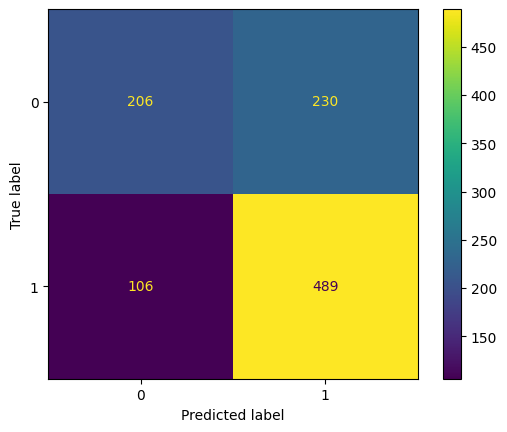

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.67      0.46      0.54       193
           1       0.66      0.83      0.74       249

    accuracy                           0.67       442
   macro avg       0.67      0.64      0.64       442
weighted avg       0.67      0.67      0.65       442
 



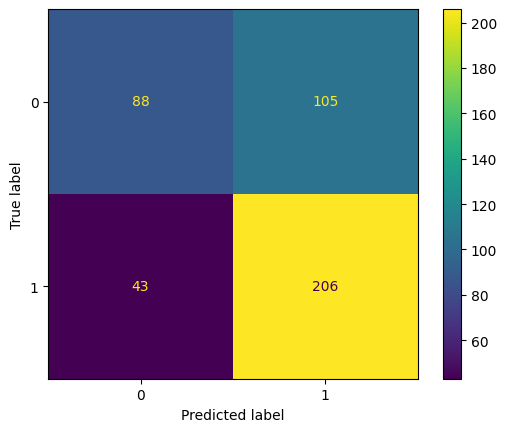

In [ ]:
## Confusion matrix on the test data
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [ ]:
tn,fp,fn,tp

(88, 105, 43, 206)

In [ ]:
(tp+tn)/(tp+tn+fp+fn)# ACCURACY of predicting 0's and 1's correctly

0.665158371040724

In [ ]:
tp/(tp+fp)#Precision for 1's

0.662379421221865

In [ ]:
tp/(tp+fn)#Recall for 1's

0.8273092369477911

Build a Linear Discriminant Analysis model

In [ ]:
#top five rows
df2.head()

Wife_age Wife_education Husband_education  No_of_children_born  \
0      24.0        Primary         Secondary                  3.0   
1      45.0     Uneducated         Secondary                 10.0   
2      43.0        Primary         Secondary                  7.0   
3      42.0      Secondary           Primary                  9.0   
4      36.0      Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure Contraceptive_method_used  
0        Exposed                        No  
1        Exposed                        No  
2        Exposed                        No  
3        Exposed                        No  
4        Exposed                        No

In [ ]:
#null value
df2.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
#for loop to see the value counts in df2
for i in df2.columns:
  #if df2.dtypes[i]! == "int":
  print(df2[i].value_counts().sort_values(ascending=False))
  print(df2[i].unique())
  print("_____________________________")

Wife_age
32.0    124
25.0     74
26.0     60
30.0     57
28.0     57
       ... 
46.0     19
19.0     17
17.0      8
18.0      6
16.0      3
Name: count, Length: 34, dtype: int64
[24. 45. 43. 42. 36. 19. 38. 21. 27. 44. 26. 48. 39. 37. 46. 40. 29. 31.
 33. 25. 28. 47. 32. 49. 34. 20. 22. 30. 23. 35. 41. 17. 18. 16.]
_____________________________
Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64
['Primary' 'Uneducated' 'Secondary' 'Tertiary']
_____________________________
Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64
['Secondary' 'Primary' 'Tertiary' 'Uneducated']
_____________________________
No_of_children_born
2.0     258
1.0     257
3.0     253
4.0     180
5.0     126
       ... 
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: count, Length: 15, dtype: int64
[ 3. 10.  7.  9.  8.  0.  6.  1.  2.  4.  5. 12. 11. 13. 16.]
______________

Convert Object Feature types for Linear Discriminant Analysis

In [ ]:
#assigning the interger to the features
df2['Wife_education']=np.where(df2['Wife_education'] =='Uneducated', 0, df2['Wife_education'])
df2['Wife_education']=np.where(df2['Wife_education'] =='Primary', 1, df2['Wife_education'])
df2['Wife_education']=np.where(df2['Wife_education'] =='Secondary', 2, df2['Wife_education'])
df2['Wife_education']=np.where(df2['Wife_education'] =='Tertiary', 3, df2['Wife_education'])


In [ ]:
#assigning the interger to the features
df2['Husband_education']=np.where(df2['Husband_education'] =='Uneducated', 0, df2['Husband_education'])
df2['Husband_education']=np.where(df2['Husband_education'] =='Primary', 1, df2['Husband_education'])
df2['Husband_education']=np.where(df2['Husband_education'] =='Secondary', 2, df2['Husband_education'])
df2['Husband_education']=np.where(df2['Husband_education'] =='Tertiary', 3, df2['Husband_education'])

In [ ]:
#assigning the interger to the features
df2['Wife_religion']=np.where(df2['Wife_religion'] =='Scientology', 0, df2['Wife_religion'])
df2['Wife_religion']=np.where(df2['Wife_religion'] =='Non-Scientology', 1, df2['Wife_religion'])

In [ ]:
#assigning the interger to the features
df2['Wife_Working']=np.where(df2['Wife_Working'] =='No', 0, df2['Wife_Working'])
df2['Wife_Working']=np.where(df2['Wife_Working'] =='Yes', 1, df2['Wife_Working'])

In [ ]:
#assigning the interger to the features
df2['Standard_of_living_index']=np.where(df2['Standard_of_living_index'] =='Low', 0, df2['Standard_of_living_index'])
df2['Standard_of_living_index']=np.where(df2['Standard_of_living_index'] =='Very Low', 1, df2['Standard_of_living_index'])
df2['Standard_of_living_index']=np.where(df2['Standard_of_living_index'] =='High', 2, df2['Standard_of_living_index'])
df2['Standard_of_living_index']=np.where(df2['Standard_of_living_index'] =='Very High', 3, df2['Standard_of_living_index'])

In [ ]:
#assigning the interger to the features
df2['Media_exposure']=np.where(df2['Media_exposure'] =='Not-Exposed', 0, df2['Media_exposure'])
df2['Media_exposure']=np.where(df2['Media_exposure'] =='Exposed', 1, df2['Media_exposure'])

In [ ]:
#assigning the interger to the features
df2['Contraceptive_method_used']=np.where(df2['Contraceptive_method_used'] =='Yes', 1, df2['Contraceptive_method_used'])
df2['Contraceptive_method_used']=np.where(df2['Contraceptive_method_used'] =='No', 0, df2['Contraceptive_method_used'])

In [ ]:
df2.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               1                 2                  3.0   
1      45.0               0                 2                 10.0   
2      43.0               1                 2                  7.0   
3      42.0               2                 1                  9.0   
4      36.0               2                 2                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0             0            0                   2                        2   
1             0            0                   3                        3   
2             0            0                   3                        3   
3             0            0                   3                        2   
4             0            0                   3                        0   

  Media_exposure  Contraceptive_method_used  
0               1                         0  
1               1                         0  
2               1                         0  
3               1                         0  
4               1                         0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
X = scaler.fit_transform(df2.drop(['Contraceptive_method_used'],axis=1))
Y = df2['Contraceptive_method_used']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
#Build LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf = LinearDiscriminantAnalysis()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train= le.fit_transform(Y_train)
Y_test= le.fit_transform(Y_test)
#x_train= le.fit_transform(X_train)
#x_test= le.fit_transform(X_test)
model = clf.fit(X_train, Y_train)

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

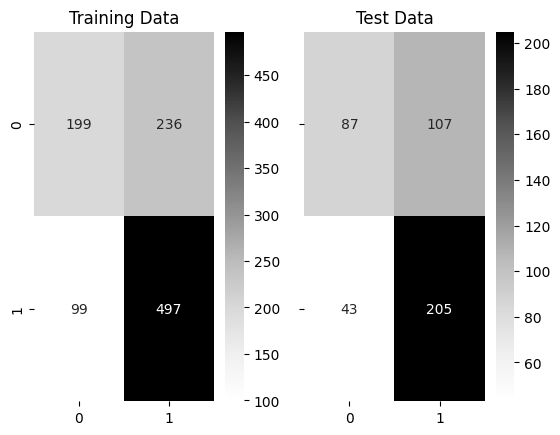

In [ ]:
#import metric library
from sklearn import metrics

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

Training Data and Test Data Classification Report Comparison

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.48      0.56       428
           1       0.67      0.81      0.73       547

    accuracy                           0.67       975
   macro avg       0.67      0.65      0.65       975
weighted avg       0.67      0.67      0.66       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.40      0.51       186
           1       0.64      0.85      0.73       232

    accuracy                           0.65       418
   macro avg       0.66      0.63      0.62       418
weighted avg       0.66      0.65      0.63       418
 



In [ ]:
model.intercept_

array([-1.21752732])

In [ ]:
model.coef_

array([[-2.43895664,  1.59020699,  0.03149558,  4.56645729,  0.49779775,
        -0.06888289,  0.0604191 ,  0.58225127,  0.36156881]])

In [ ]:
df2.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.700
AUC for the Test Data: 0.691


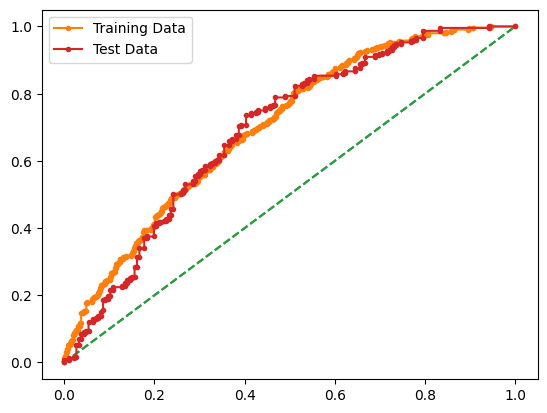

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
probabilities = model.predict_proba(X_train)[:,1]

for i in np.arange(0.1,1,0.1):
    predictions = []
    for j in probabilities:
        if j > i:
            predictions.append(1)
        else:
            predictions.append(0)
    print('Accuracy for the cut off {}'.format(i))
    print(metrics.classification_report(Y_train,predictions))

Accuracy for the cut off 0.1
              precision    recall  f1-score   support

           0       1.00      0.04      0.07       428
           1       0.57      1.00      0.73       547

    accuracy                           0.58       975
   macro avg       0.78      0.52      0.40       975
weighted avg       0.76      0.58      0.44       975

Accuracy for the cut off 0.2
              precision    recall  f1-score   support

           0       0.93      0.09      0.17       428
           1       0.58      0.99      0.74       547

    accuracy                           0.60       975
   macro avg       0.76      0.54      0.45       975
weighted avg       0.74      0.60      0.49       975

Accuracy for the cut off 0.30000000000000004
              precision    recall  f1-score   support

           0       0.88      0.18      0.30       428
           1       0.60      0.98      0.75       547

    accuracy                           0.63       975
   macro avg       0.74  

Using LDA for Dimensionality Reduction

In [ ]:
#no need

lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, Y_train)
X_test_lda = lda_model.transform(X_test)

In [ ]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(975, 1)
(418, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, Y_train)
y_pred = model.predict(X_test_lda)

In [ ]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.42      0.53       186
           1       0.65      0.85      0.74       232

    accuracy                           0.66       418
   macro avg       0.67      0.64      0.63       418
weighted avg       0.67      0.66      0.64       418
 



Build a CART model - Prune the CART model by finding the best hyperparameters using GridSearch

In [ ]:
#Copy the Dataset to df4
df4=df2.copy()

In [ ]:
df4.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [ ]:
df4.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [ ]:
df4.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [ ]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types.
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df4.columns:
    if df4[feature].dtype == 'object':
        df4[feature] = pd.Categorical(df4[feature]).codes

In [ ]:
#independent variable
X=df4.drop("Contraceptive_method_used", axis=1)

In [ ]:
Y=df4["Contraceptive_method_used"]

In [ ]:
X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (975, 9)
X_test (418, 9)
train_labels (975,)
test_labels (418,)


Building a Decision Tree Classifier

In [ ]:
# Initialise a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [ ]:
X_train

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
453       31.0                2                  2                  1.0   
99        27.0                0                  1                  5.0   
1044      31.0                2                  2                  3.0   
807       25.0                0                  1                  4.0   
1400       NaN                1                  2                  4.0   
...        ...              ...                ...                  ...   
715       43.0                1                  1                  5.0   
905       22.0                3                  1                  2.0   
1096      24.0                1                  2                  2.0   
235       27.0                0                  1                  1.0   
1061      30.0                3                  1                  1.0   

      Wife_religion  Wife_Working  Husband_Occupation  \
453               1             0                   1   
99                1             0                   2   
1044              1             1                   2   
807               1             0                   3   
1400              1             0                   3   
...             ...           ...                 ...   
715               1             1                   3   
905               1             0                   3   
1096              1             0                   2   
235               1             1                   3   
1061              1             0                   3   

      Standard_of_living_index  Media_exposure   
453                          2                0  
99                           3                0  
1044                         0                0  
807                          0                0  
1400                         2                0  
...                        ...              ...  
715                          0                0  
905                          1                0  
1096                         2                0  
235                          2                0  
1061                         2                0  

[1031 rows x 9 columns]

In [ ]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

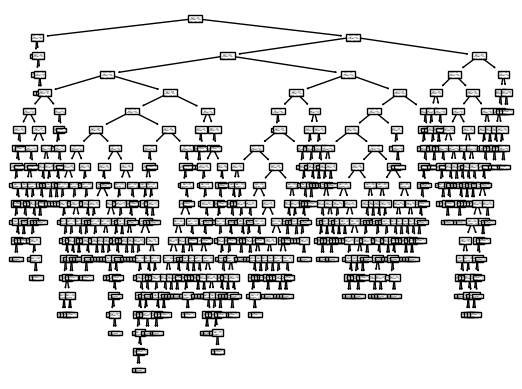

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dt_model);

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

Variable Importance

In [ ]:
X_train

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
336       34.0                2                  1                  0.0   
781       37.0                2                  2                  3.0   
433       37.0                2                  2                  2.0   
588       29.0                2                  2                  2.0   
468       24.0                3                  2                  1.0   
...        ...              ...                ...                  ...   
739       32.0                2                  2                  2.0   
941       36.0                3                  1                  6.0   
1145      45.0                2                  2                  1.0   
238       39.0                1                  1                  6.0   
1109      35.0                2                  2                  3.0   

      Wife_religion  Wife_Working  Husband_Occupation  \
336               0             1                   3   
781               1             0                   2   
433               1             1                   3   
588               1             0                   3   
468               1             1                   4   
...             ...           ...                 ...   
739               1             1                   1   
941               1             0                   3   
1145              1             1                   1   
238               1             0                   3   
1109              1             0                   1   

      Standard_of_living_index  Media_exposure   
336                          0                0  
781                          2                0  
433                          0                0  
588                          2                0  
468                          1                1  
...                        ...              ...  
739                          0                0  
941                          1                0  
1145                         2                0  
238                          0                0  
1109                         2                0  

[975 rows x 9 columns]

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.316405
No_of_children_born       0.209281
Husband_Occupation        0.106524
Standard_of_living_index  0.105268
Wife_ education           0.101130
Wife_Working              0.059402
Husband_education         0.052143
Wife_religion             0.033711
Media_exposure            0.016136


Predicting Test Data

In [ ]:
y_predict = dt_model.predict(X_test)

In [ ]:
train_pred = dt_model.predict(X_train)

In [ ]:
print(classification_report(train_labels, train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       422
           1       1.00      0.97      0.99       553

    accuracy                           0.98       975
   macro avg       0.98      0.99      0.98       975
weighted avg       0.98      0.98      0.98       975



In [ ]:
print(classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       192
           1       0.64      0.61      0.63       226

    accuracy                           0.61       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.61      0.61      0.61       418



Overfit

Regularising the Decision Tree

Adding Tuning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [10,15,20],
              'min_samples_leaf':[10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_leaf': [10, 15, 20]},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=15,
                       random_state=123)

In [ ]:
reg_dt_model = DecisionTreeClassifier(ccp_alpha=0.01,criterion='entropy', max_depth=10,random_state=123)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       random_state=123)

Generating New Tree

In [ ]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

Variable Importance

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.564540
Wife_age                  0.253804
Wife_ education           0.142963
Husband_education         0.038693
Wife_religion             0.000000
Wife_Working              0.000000
Husband_Occupation        0.000000
Standard_of_living_index  0.000000
Media_exposure            0.000000


Predicting on Training and Test dataset

In [ ]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [ ]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [ ]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63       422
           1       0.71      0.81      0.76       553

    accuracy                           0.71       975
   macro avg       0.70      0.69      0.69       975
weighted avg       0.70      0.71      0.70       975



In [ ]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.53      0.59       192
           1       0.66      0.79      0.72       226

    accuracy                           0.67       418
   macro avg       0.67      0.66      0.66       418
weighted avg       0.67      0.67      0.66       418



Getting the Predicted Classes

In [ ]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.192623  0.807377
1  0.192623  0.807377
2  0.233333  0.766667
3  0.192623  0.807377
4  0.192623  0.807377

Model Evaluation

Measuring AUC-ROC Curve

AUC and ROC for the training data

AUC: 0.757


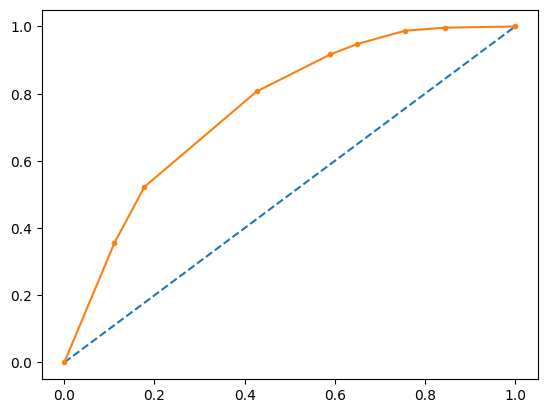

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

AUC and ROC for the test data

AUC: 0.706


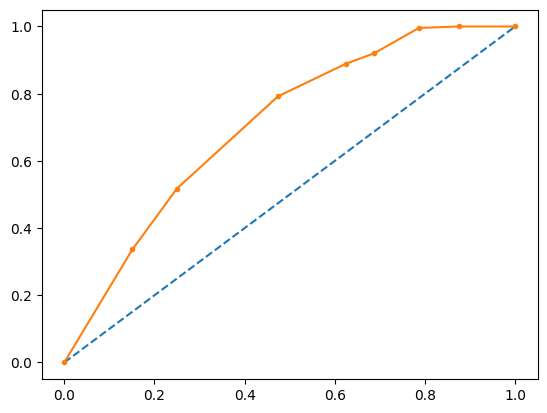

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Confusion Matrix for the training data

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

array([[242, 180],
       [107, 446]])

In [ ]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.7056410256410256

In [ ]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63       422
           1       0.71      0.81      0.76       553

    accuracy                           0.71       975
   macro avg       0.70      0.69      0.69       975
weighted avg       0.70      0.71      0.70       975



Confusion Matrix for test data

In [ ]:
confusion_matrix(test_labels, ytest_predict)

array([[101,  91],
       [ 47, 179]])

In [ ]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6698564593301436

In [ ]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.53      0.59       192
           1       0.66      0.79      0.72       226

    accuracy                           0.67       418
   macro avg       0.67      0.66      0.66       418
weighted avg       0.67      0.67      0.66       418

